# Breast Cancer.

### Introducción al Conjunto de Datos sobre Cáncer de Mama.

Este conjunto de datos se basa en información recopilada por el Programa SEER (Surveillance, Epidemiology, and End Results) del Instituto Nacional del Cáncer (NCI), actualizado en noviembre de 2017. El SEER es un programa de vigilancia del cáncer que recopila datos a nivel nacional para proporcionar estadísticas detalladas sobre diversos tipos de cáncer.

El enfoque de este conjunto de datos se centra específicamente en pacientes femeninas diagnosticadas con carcinoma lobular y de conducto infiltrante de cáncer de mama. La recopilación de datos abarca el período comprendido entre los años 2006 y 2010.

Se aplicaron criterios de exclusión rigurosos para garantizar la calidad de la información. Se eliminaron pacientes con datos insuficientes, como el tamaño del tumor desconocido, nodos linfáticos regionales no examinados y nodos linfáticos regionales con resultados positivos, así como aquellos cuya supervivencia fue inferior a 1 mes. Como resultado de estos criterios, el conjunto de datos final incluye un total de 4.024 pacientes.



In [101]:
#!pip install gTTS

In [102]:
#from gtts import gTTS
#from IPython.display import Audio
#tts = gTTS('Este conjunto de datos se basa en información recopilada por el Programa SEER (Surveillance, Epidemiology, and End Results) del Instituto Nacional del Cáncer (NCI), actualizado en noviembre de 2017. El SEER es un programa de vigilancia del cáncer que recopila datos a nivel nacional para proporcionar estadísticas detalladas sobre diversos tipos de cáncer.El enfoque de este conjunto de datos se centra específicamente en pacientes femeninas diagnosticadas con carcinoma lobular y de conducto infiltrante de cáncer de mama. La recopilación de datos abarca el período comprendido entre los años 2006 y 2010.Se aplicaron criterios de exclusión rigurosos para garantizar la calidad de la información. Se eliminaron pacientes con datos insuficientes, como el tamaño del tumor desconocido, nodos linfáticos regionales no examinados y nodos linfáticos regionales con resultados positivos, así como aquellos cuya supervivencia fue inferior a 1 mes. Como resultado de estos criterios, el conjunto de datos final incluye un total de 4.024 pacientes.',lang='es')
#tts.save('1.wav')
#sound_file = '1.wav'
#Audio(sound_file, autoplay=True)

### Variables clave en el conjunto de datos.

Age: Edad de la paciente.

Race: Raza de la paciente.

Marital Status: Estado civil de la paciente.

T Stage: Estado T del tumor (Tamaño del tumor primario).

N Stage: Estado N del tumor (Afectación de los ganglios linfáticos regionales).

6th Stage: Estado general del cáncer basado en la clasificación de la sexta edición del sistema TNM.

Differentiate: Grado de diferenciación del tumor.

Grade: Grado del tumor.

A Stage: Etapa del cáncer.

Tumor Size: Tamaño del tumor.

Estrogen Status: Estado del receptor de estrógeno.

Progesterone Status: Estado del receptor de progesterona.

Regional Node Examined: Número de nodos linfáticos regionales examinados.

Regional Node Positive: Número de nodos linfáticos regionales con resultados positivos.

Survival Months: Meses de supervivencia.

Status: Estado actual de la paciente (viva o fallecida).

Estos atributos proporcionan información valiosa para analizar y comprender mejor el cáncer de mama, sus características clínicas y los resultados de supervivencia en el grupo de pacientes seleccionado.

### Librerias.

In [103]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### Cargar Base de Datos.

In [104]:
from google.colab import files

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [106]:
df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/3. Breast_Cancer/Breast_Cancer.csv")
df.shape

(4024, 16)

In [107]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [108]:
df.info

<bound method DataFrame.info of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]>

In [109]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [110]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [111]:
df.head (10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


### Estrucurando un Proyecto de DS PARTE 1

##Preguntas de Interés:
¿Existe alguna relación entre la edad de las pacientes y la etapa del cáncer de mama en el momento del diagnóstico?

¿Cómo afecta el tamaño del tumor al estadio del cáncer de mama?

¿Hay diferencias en la supervivencia entre pacientes con carcinoma lobular y pacientes con carcinoma de conducto infiltrante?

¿La raza de las pacientes influye en la etapa del cáncer o en la supervivencia?

¿Existe una asociación entre el estado marital y la etapa del cáncer de mama?

¿Cómo se relacionan las variables de diferenciación y grado del tumor?

¿Hay alguna correlación entre el tamaño del tumor y el número de nodos linfáticos regionales examinados?

¿La presencia de receptores de estrógeno o progesterona está relacionada con la supervivencia?

##Visualizaciones y Resúmenes Numéricos:

Edad de las pacientes:
Histograma de distribución de edades.
Resumen numérico: media, mediana, desviación estándar.

Tamaño del tumor:
Boxplot del tamaño del tumor.
Resumen numérico: cuartiles, rango intercuartílico.

Relación entre edad y estado del cáncer:
Gráfico de dispersión de edad vs. estadio del cáncer.

Distribución de la supervivencia:
Histograma de meses de supervivencia.
Resumen numérico: percentiles, media.

Relación entre tamaño del tumor y nodos linfáticos examinados:
Gráfico de dispersión de tamaño del tumor vs. nodos examinados.

Comparación de supervivencia por tipo de diferenciación:
Boxplot de meses de supervivencia según el grado de diferenciación.

Comparación de etapas por raza:
Gráfico de barras apiladas de etapas de cáncer por raza.

Matriz de correlación:
Visualización de la correlación entre variables numéricas.

Text(0, 0.5, 'Frecuencia')

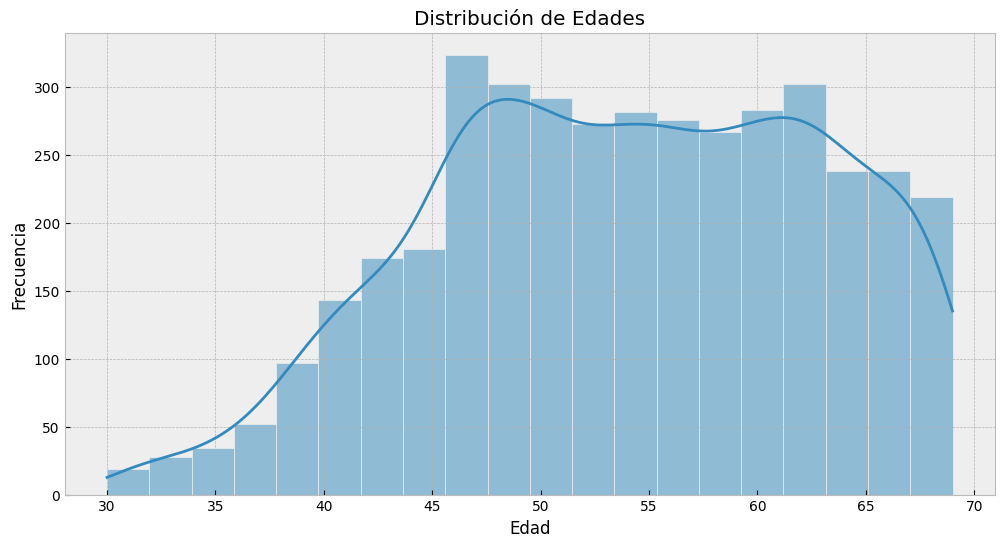

In [112]:
# 1. Visualización y resumen numérico de la Edad de las pacientes
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Text(0.5, 0, 'Tamaño del Tumor')

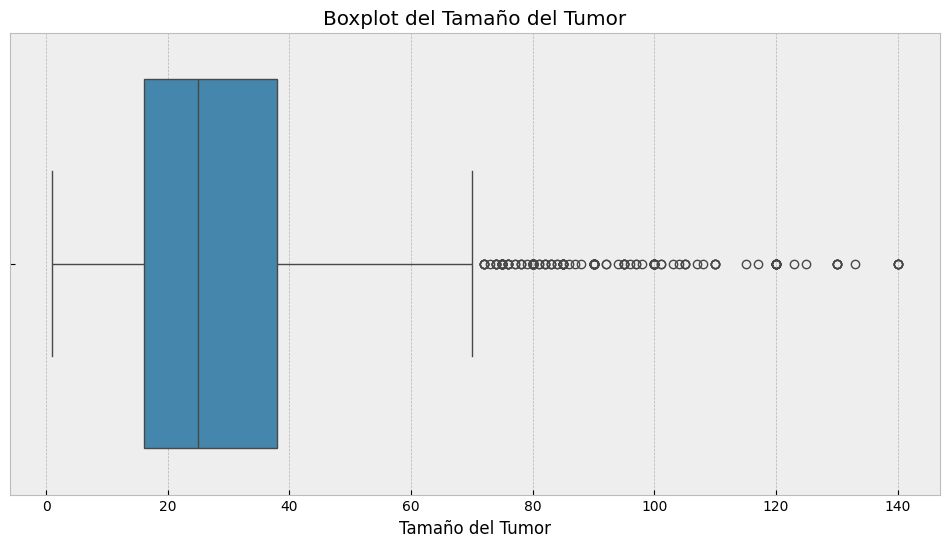

In [113]:
# 2. Visualización y resumen numérico del Tamaño del tumor
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tumor Size', data=df)
plt.title('Boxplot del Tamaño del Tumor')
plt.xlabel('Tamaño del Tumor')

Text(0, 0.5, 'Etapa del cáncer')

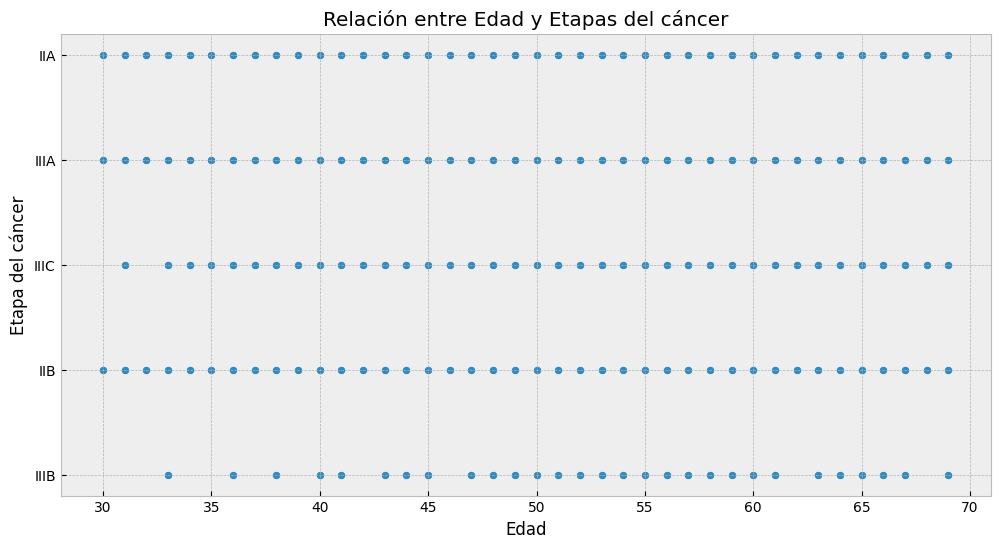

In [114]:
# 3. Relación entre Edad y Etapas del cáncer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='6th Stage', data=df)
plt.title('Relación entre Edad y Etapas del cáncer')
plt.xlabel('Edad')
plt.ylabel('Etapa del cáncer')

Text(0, 0.5, 'Frecuencia')

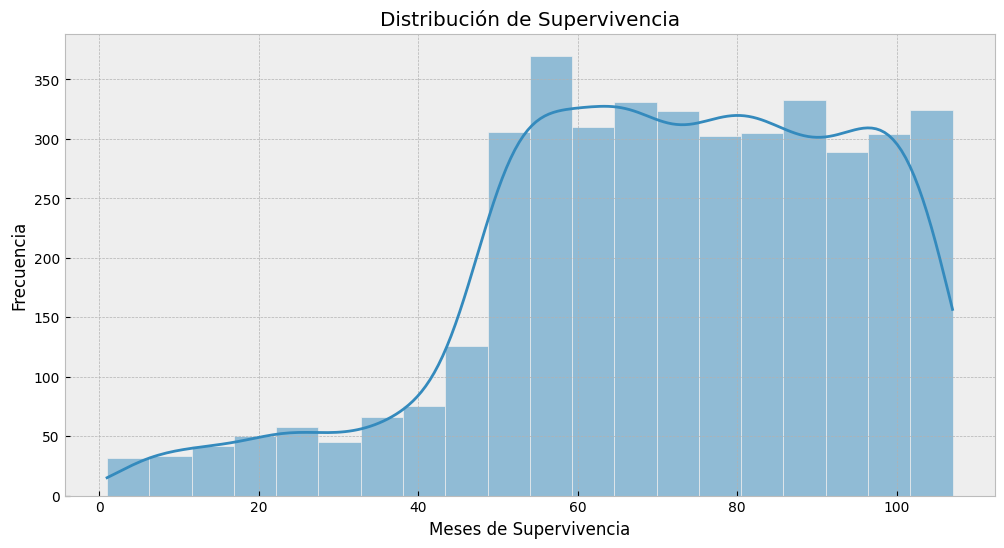

In [115]:
# 4. Distribución de la Supervivencia
plt.figure(figsize=(12, 6))
sns.histplot(df['Survival Months'], bins=20, kde=True)
plt.title('Distribución de Supervivencia')
plt.xlabel('Meses de Supervivencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Nodos Examinados')

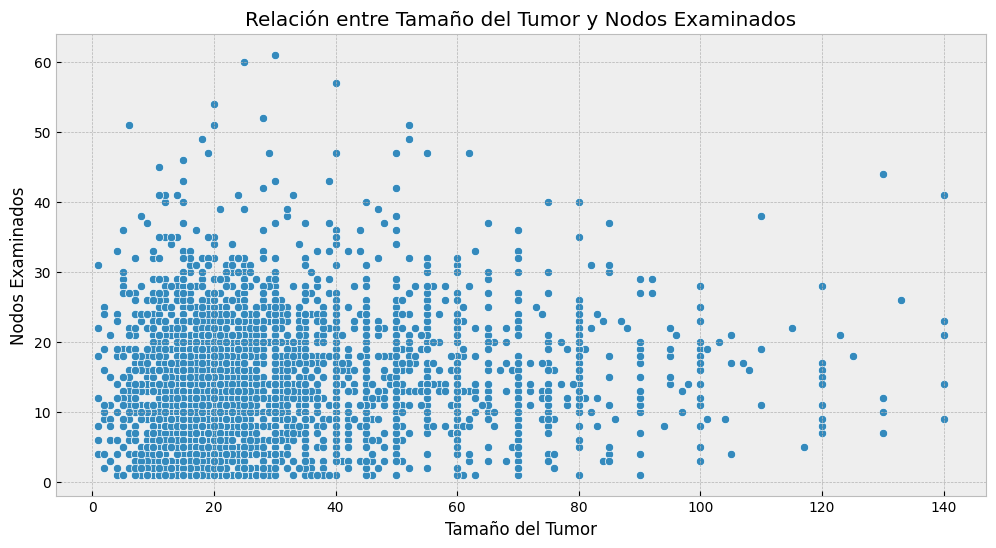

In [116]:
# 5. Relación entre Tamaño del tumor y Nodos linfáticos examinados
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tumor Size', y='Regional Node Examined', data=df)
plt.title('Relación entre Tamaño del Tumor y Nodos Examinados')
plt.xlabel('Tamaño del Tumor')
plt.ylabel('Nodos Examinados')

Text(0, 0.5, 'Meses de Supervivencia')

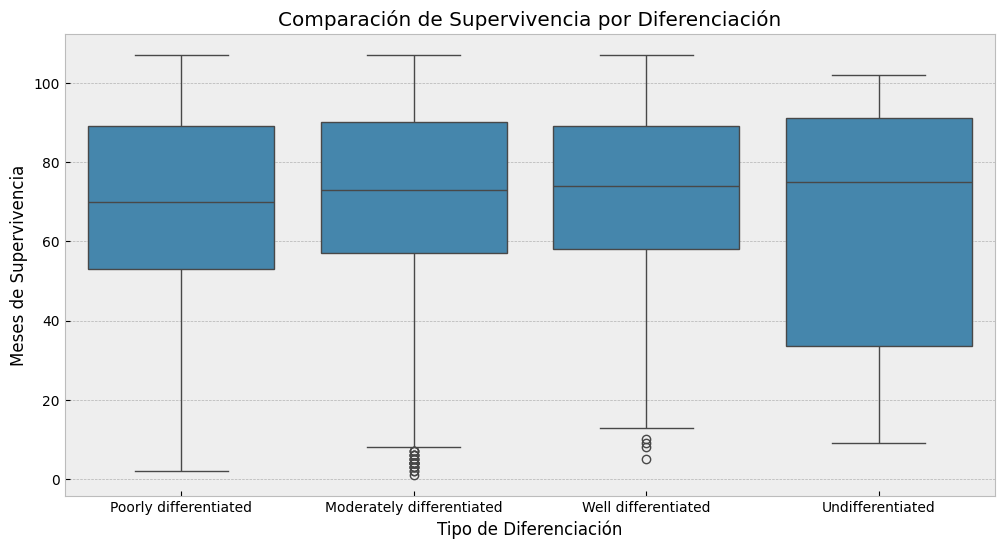

In [117]:
# 6. Comparación de Supervivencia por tipo de diferenciación
plt.figure(figsize=(12, 6))
sns.boxplot(x='differentiate', y='Survival Months', data=df)
plt.title('Comparación de Supervivencia por Diferenciación')
plt.xlabel('Tipo de Diferenciación')
plt.ylabel('Meses de Supervivencia')

Text(0, 0.5, 'Cantidad')

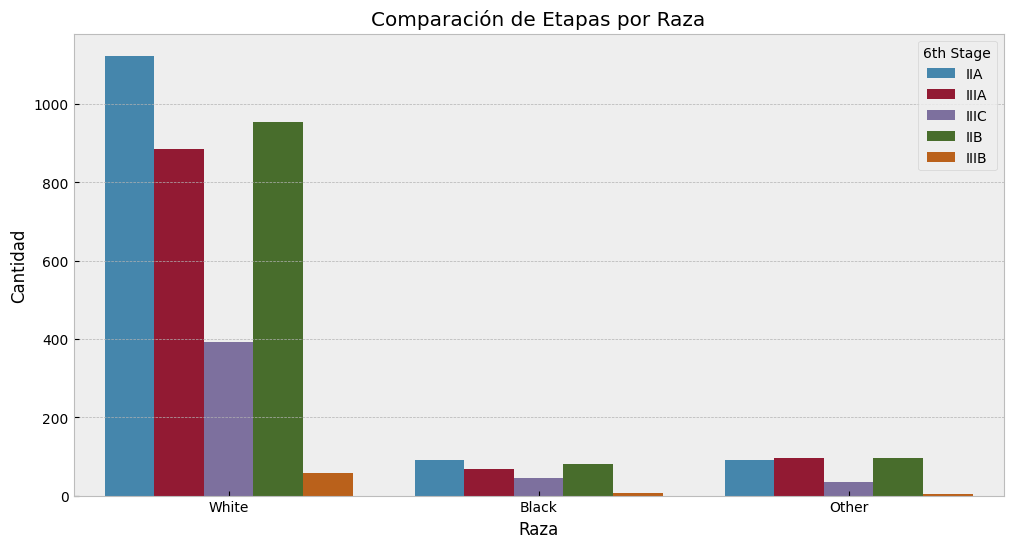

In [118]:
# 7. Comparación de Etapas por Raza
plt.figure(figsize=(12, 6))
sns.countplot(x='Race', hue='6th Stage', data=df)
plt.title('Comparación de Etapas por Raza')
plt.xlabel('Raza')
plt.ylabel('Cantidad')

In [119]:
# Resúmenes numéricos
print("Resumen numérico de Edades:")
print(df['Age'].describe())

print("\nResumen numérico del Tamaño del Tumor:")
print(df['Tumor Size'].describe())

print("\nResumen numérico de la Supervivencia:")
print(df['Survival Months'].describe())

Resumen numérico de Edades:
count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64

Resumen numérico del Tamaño del Tumor:
count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64

Resumen numérico de la Supervivencia:
count    4024.000000
mean       71.297962
std        22.921430
min         1.000000
25%        56.000000
50%        73.000000
75%        90.000000
max       107.000000
Name: Survival Months, dtype: float64


### Estrucurando un Proyecto de DS PARTE 2

###Abstracto con motivación y audiencia:
El estudio se enfoca en un conjunto de datos del Programa SEER del Instituto Nacional del Cáncer sobre pacientes femeninas diagnosticadas con carcinoma lobular y de conducto infiltrante de cáncer de mama entre 2006 y 2010. El objetivo es proporcionar insights valiosos para mejorar la comprensión de factores relacionados con la supervivencia en este grupo de pacientes. La audiencia principal son profesionales de la salud, investigadores y responsables de la toma de decisiones en el ámbito oncológico.

###Preguntas/Hipótesis que queremos resolver mediante el análisis de datos:

¿Cuáles son los factores que más influyen en la supervivencia de las pacientes con cáncer de mama?

¿Existen patrones o tendencias en la edad, etapa del tumor, tamaño del tumor, estado hormonal, entre otros, que puedan proporcionar información valiosa?

¿Hay alguna relación entre el estado civil y la supervivencia de las pacientes?

###Análisis Exploratorio de Datos (EDA):

Se han realizado visualizaciones y resúmenes numéricos para explorar diversas variables clave. Entre ellas se encuentran la distribución de edades, el tamaño del tumor, la relación entre la edad y las etapas del cáncer, la distribución de la supervivencia, la relación entre el tamaño del tumor y los nodos linfáticos examinados, la comparación de la supervivencia por tipo de diferenciación celular y la comparación de etapas por raza. Además, se ha incluido una matriz de correlación para evaluar las relaciones entre las variables.

###Recomendaciones basadas en los insights observados:
Se podría considerar un enfoque de tratamiento personalizado, teniendo en cuenta la edad y el tipo de diferenciación celular.

Dada la relación entre el tamaño del tumor y la supervivencia, se podrían explorar estrategias de detección temprana y tratamientos específicos para tumores de ciertos tamaños.

La relación entre el tamaño del tumor y la cantidad de nodos linfáticos examinados sugiere la importancia de una evaluación exhaustiva de los nodos en pacientes con tumores más grandes.

La comparación de etapas por raza podría motivar investigaciones adicionales sobre disparidades en el diagnóstico y tratamiento.

###Avances en los apartados:

Definición del Objetivo:
El objetivo principal de este análisis es comprender y predecir la supervivencia de pacientes femeninas diagnosticadas con carcinoma lobular y de conducto infiltrante de cáncer de mama. La variable objetivo es "Survival Months", que representa la cantidad de meses que una paciente ha sobrevivido después del diagnóstico. La predicción de la supervivencia es esencial para ofrecer información valiosa a profesionales de la salud, investigadores y pacientes, permitiendo una mejor planificación del tratamiento y la toma de decisiones.

Contexto Comercial:
En el ámbito comercial, este análisis puede proporcionar información valiosa para las compañías farmacéuticas, hospitales y profesionales de la salud. La capacidad de prever la supervivencia de pacientes con cáncer de mama puede influir en el desarrollo de tratamientos más efectivos y personalizados, así como en la asignación eficiente de recursos en el sistema de salud.

Problema Comercial:
El problema principal es la necesidad de identificar factores que afectan la supervivencia de pacientes con cáncer de mama y desarrollar un modelo predictivo preciso. Esto permitirá a los profesionales de la salud tomar decisiones informadas sobre tratamientos y proporcionar a los pacientes una comprensión más clara de su pronóstico.

Contexto Analítico:
En el contexto analítico, se busca utilizar técnicas de aprendizaje automático y análisis estadístico para desarrollar un modelo predictivo. Se explorarán las relaciones entre las diversas variables del conjunto de datos y la variable objetivo ("Survival Months") para identificar patrones y tendencias. La evaluación del rendimiento del modelo permitirá determinar su utilidad en la predicción de la supervivencia de pacientes con cáncer de mama.

Exploración de Datos (EDA):
La fase de exploración de datos implica analizar en detalle las variables proporcionadas en el conjunto de datos. Esto incluirá estadísticas descriptivas, visualizaciones y la identificación de posibles correlaciones entre las variables. Se buscarán patrones y anomalías que puedan influir en la supervivencia de los pacientes. La EDA será crucial para tomar decisiones informadas sobre la selección de características y la construcción del modelo predictivo.

In [120]:
# Tabla de distribución de Meses de Supervivencia
survival_months_distribution = df['Survival Months'].value_counts().reset_index()
survival_months_distribution.columns = ['Meses de Supervivencia', 'Frecuencia']
print(survival_months_distribution)

     Meses de Supervivencia  Frecuencia
0                        69          81
1                        63          73
2                        56          73
3                       102          73
4                        98          72
..                      ...         ...
102                       7           5
103                       3           4
104                      11           4
105                       2           3
106                       1           1

[107 rows x 2 columns]


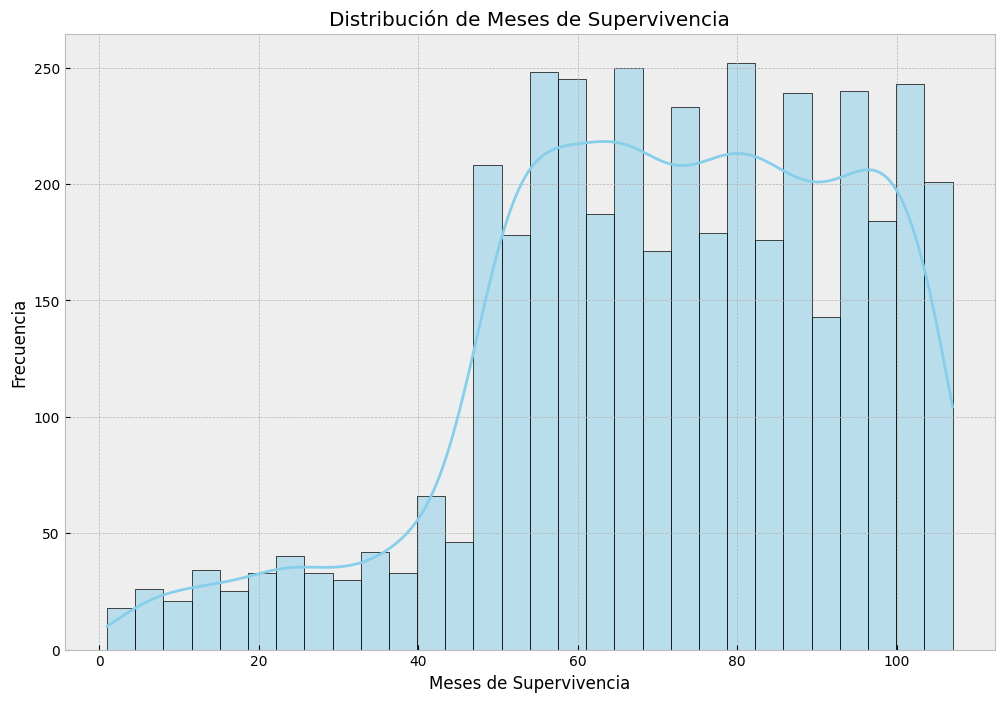

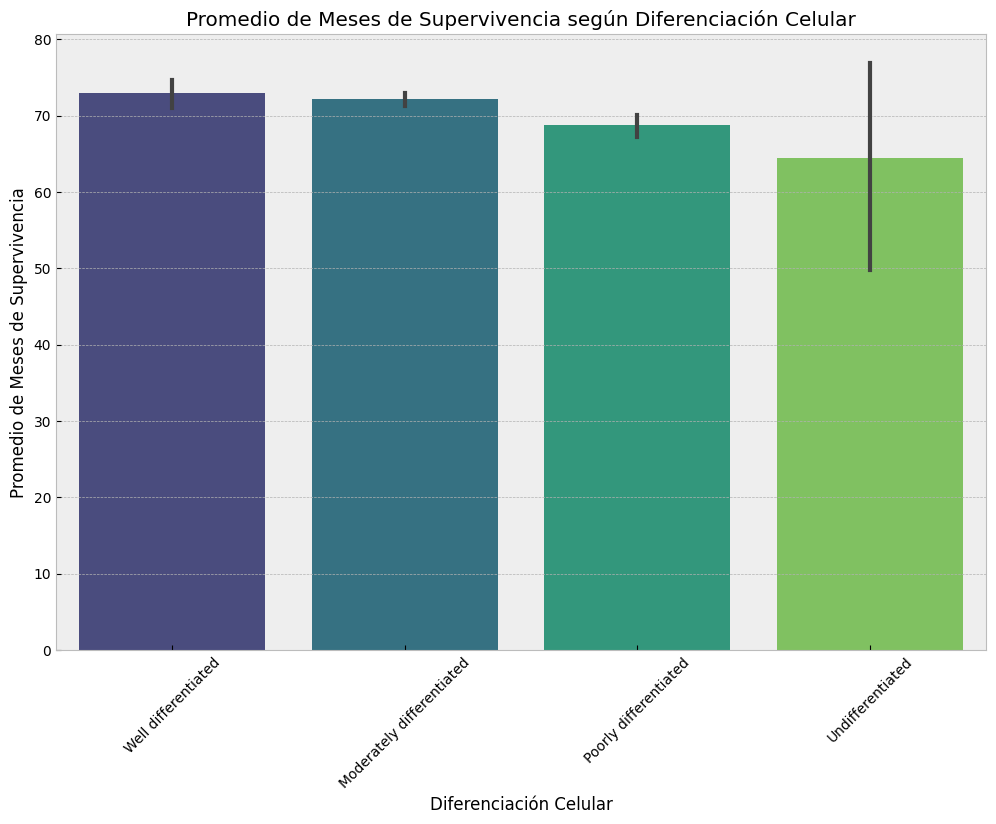

In [121]:
# Distribución de Meses de Supervivencia
plt.figure(figsize=(12, 8))
sns.histplot(df['Survival Months'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de Meses de Supervivencia')
plt.xlabel('Meses de Supervivencia')
plt.ylabel('Frecuencia')
plt.show()

average_survival = df.groupby('differentiate')['Survival Months'].mean().reset_index()
average_survival = average_survival.sort_values(by='Survival Months', ascending=False)

# Promedio de Meses de Supervivencia según Diferenciación Celular
plt.figure(figsize=(12, 8))
sns.barplot(x='differentiate', y='Survival Months', data=df, order=average_survival['differentiate'], palette='viridis')
plt.title('Promedio de Meses de Supervivencia según Diferenciación Celular')
plt.xlabel('Diferenciación Celular')
plt.ylabel('Promedio de Meses de Supervivencia')
plt.xticks(rotation=45)
plt.show()

2. Patrones o tendencias en la edad, etapa del tumor, tamaño del tumor, estado hormonal, etc.:

In [122]:
# Tabla de distribución de Diferenciación Celular y Meses de Supervivencia
differentiation_survival_table = df.groupby('differentiate')['Survival Months'].describe().reset_index()
print(differentiation_survival_table)

               differentiate   count       mean        std  min   25%   50%  \
0  Moderately differentiated  2351.0  72.179073  22.191350  1.0  57.0  73.0   
1      Poorly differentiated  1111.0  68.749775  24.887394  2.0  53.0  70.0   
2           Undifferentiated    19.0  64.421053  32.658699  9.0  33.5  75.0   
3        Well differentiated   543.0  72.937385  20.966934  5.0  58.0  74.0   

    75%    max  
0  90.0  107.0  
1  89.0  107.0  
2  91.0  102.0  
3  89.0  107.0  


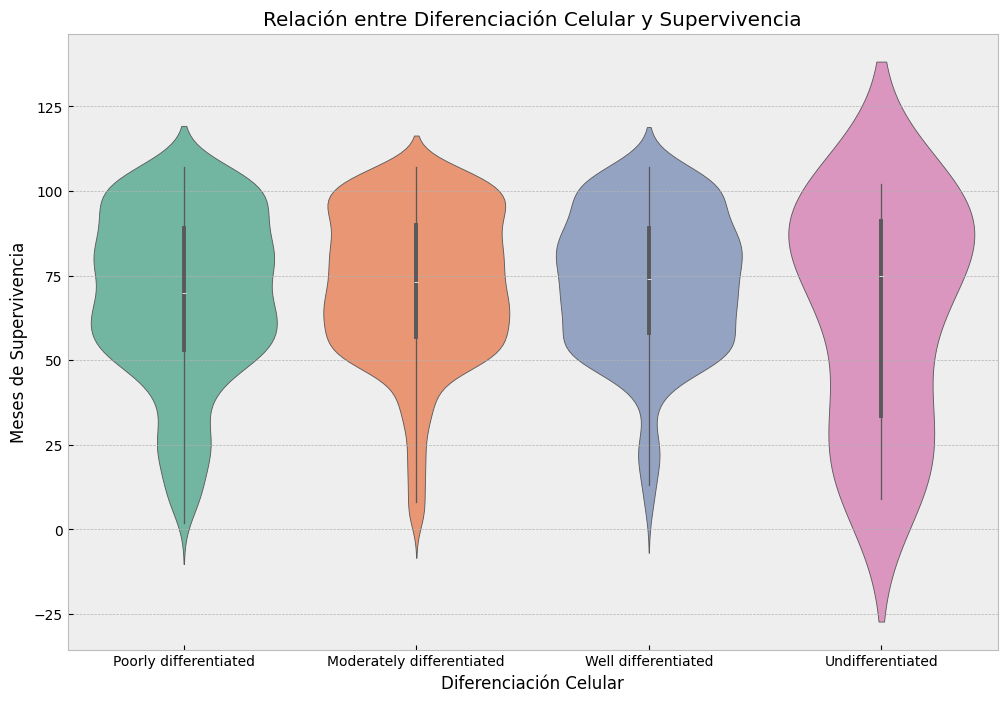

In [123]:
# Diferenciación Celular y Supervivencia
plt.figure(figsize=(12, 8))
sns.violinplot(x='differentiate', y='Survival Months', data=df, palette='Set2')
plt.title('Relación entre Diferenciación Celular y Supervivencia')
plt.xlabel('Diferenciación Celular')
plt.ylabel('Meses de Supervivencia')
plt.show()

In [124]:
# Tabla de relación entre Edad y Tamaño del Tumor
age_tumor_size_relation = df[['Age', 'Tumor Size']].groupby('Age').mean().reset_index()
print(age_tumor_size_relation)

    Age  Tumor Size
0    30   43.400000
1    31   43.642857
2    32   27.230769
3    33   35.800000
4    34   29.500000
5    35   29.850000
6    36   34.375000
7    37   32.500000
8    38   40.355556
9    39   35.980769
10   40   34.361111
11   41   31.887324
12   42   29.463415
13   43   31.793478
14   44   32.379747
15   45   30.480392
16   46   31.331288
17   47   34.621118
18   48   31.185714
19   49   33.987654
20   50   30.666667
21   51   27.743243
22   52   30.966102
23   53   27.741935
24   54   29.406250
25   55   27.610390
26   56   31.287879
27   57   29.618056
28   58   34.491667
29   59   29.340136
30   60   31.250000
31   61   28.545455
32   62   27.281879
33   63   30.281046
34   64   30.758621
35   65   29.204918
36   66   25.243697
37   67   26.436975
38   68   28.495495
39   69   29.981481


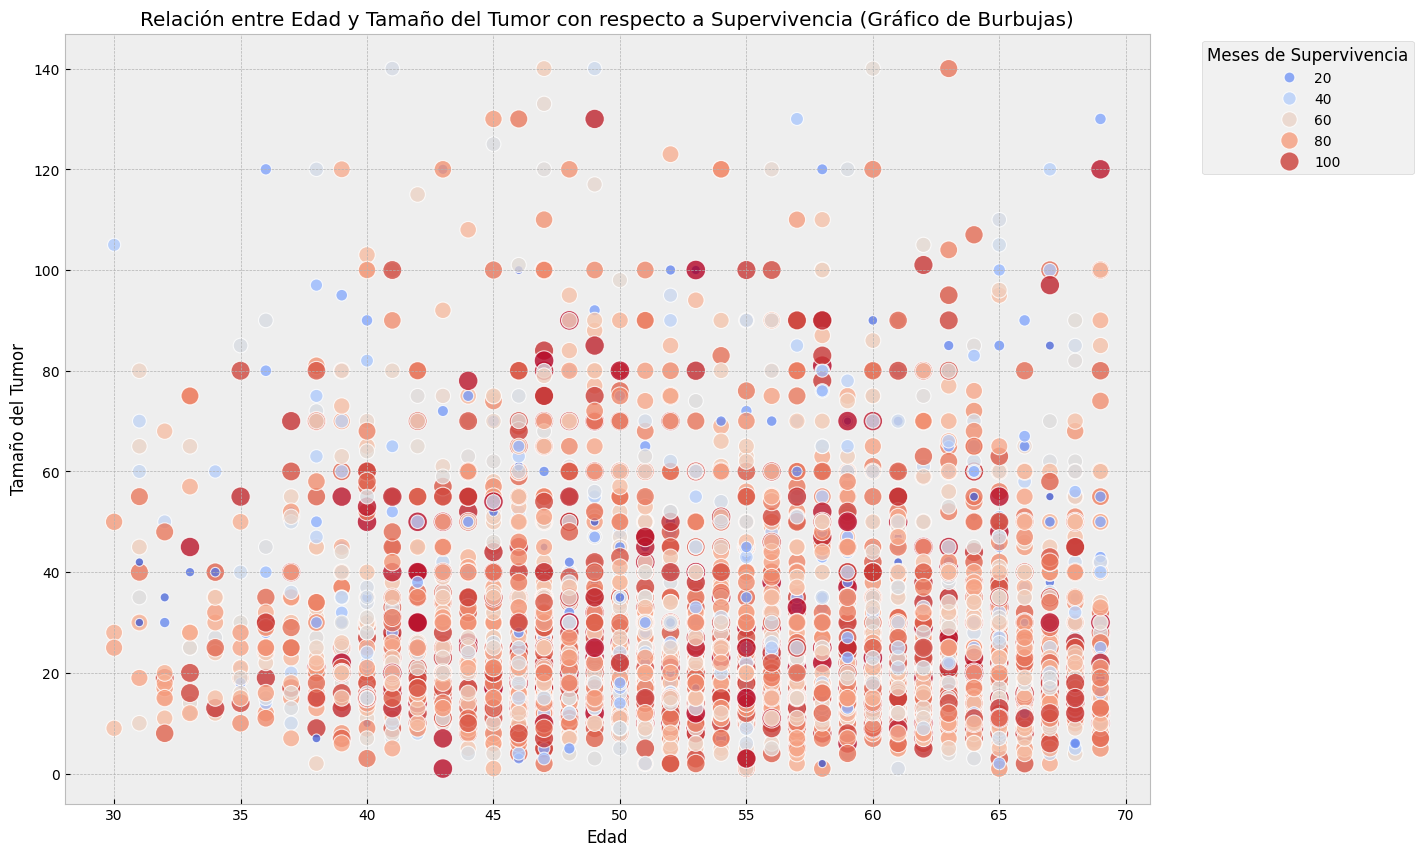

In [125]:
# Relación entre Edad y Tamaño del Tumor
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(x='Age', y='Tumor Size', hue='Survival Months', size='Survival Months', sizes=(30, 200),
                          data=df, palette='coolwarm', alpha=0.8)
scatter.legend(title='Meses de Supervivencia', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Relación entre Edad y Tamaño del Tumor con respecto a Supervivencia (Gráfico de Burbujas)')
plt.xlabel('Edad')
plt.ylabel('Tamaño del Tumor')
plt.show()

In [126]:
# Tabla de distribución de Etapas del Tumor
tumor_stage_distribution = df['6th Stage'].value_counts().reset_index()
tumor_stage_distribution.columns = ['Etapa del Tumor', 'Frecuencia']
print(tumor_stage_distribution)

  Etapa del Tumor  Frecuencia
0             IIA        1305
1             IIB        1130
2            IIIA        1050
3            IIIC         472
4            IIIB          67


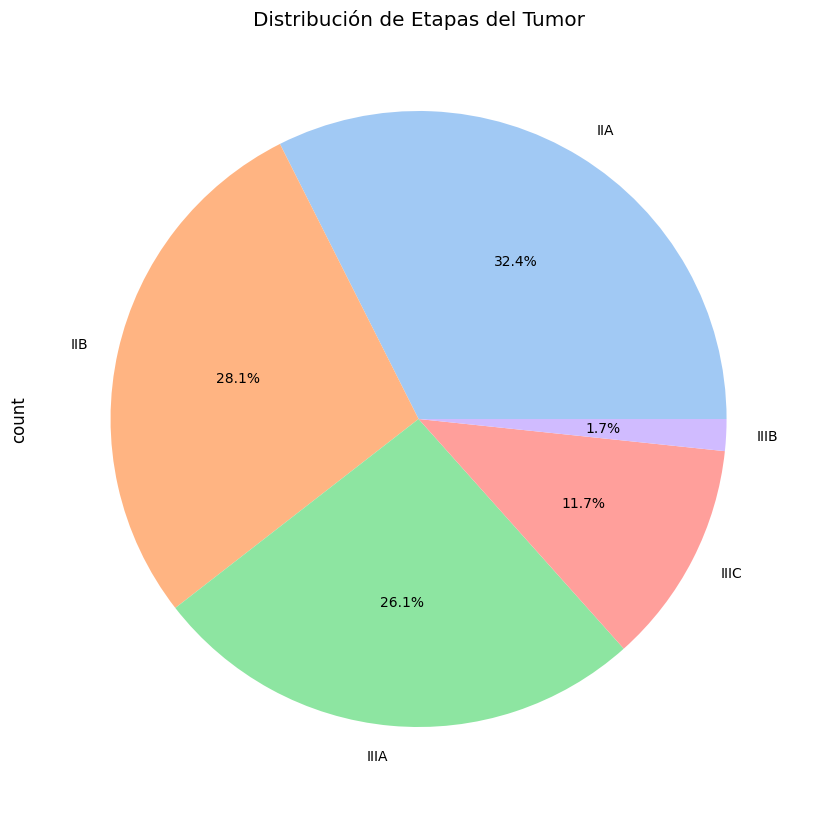

In [127]:
# Distribución de etapas del tumor
plt.figure(figsize=(10, 10))
df['6th Stage'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución de Etapas del Tumor')
plt.show()

3. Relación entre estado civil y supervivencia:

In [128]:
# Tabla de relación entre Estado Civil y Diferenciación Celular
traduccion = {
    'Married': 'Casado/a',
    'Divorced': 'Divorciado/a',
    'Single': 'Soltero/a',
    'Widowed': 'Viudo/a',
    'All': 'Total',  # Si hay una categoría 'All' en datos
}

df_print = df.replace(traduccion)

marital_differentiation_relation = pd.crosstab(df_print['Marital Status'], df_print['differentiate'], margins=True, margins_name='Total')
print(marital_differentiation_relation)

differentiate   Moderately differentiated  Poorly differentiated  \
Marital Status                                                     
Casado/a                             1569                    698   
Divorciado/a                          288                    145   
Separated                              24                     12   
Single                                342                    191   
Viudo/a                               128                     65   
Total                                2351                   1111   

differentiate   Undifferentiated  Well differentiated  Total  
Marital Status                                                
Casado/a                      11                  365   2643  
Divorciado/a                   1                   52    486  
Separated                      1                    8     45  
Single                         5                   77    615  
Viudo/a                        1                   41    235  
Total         

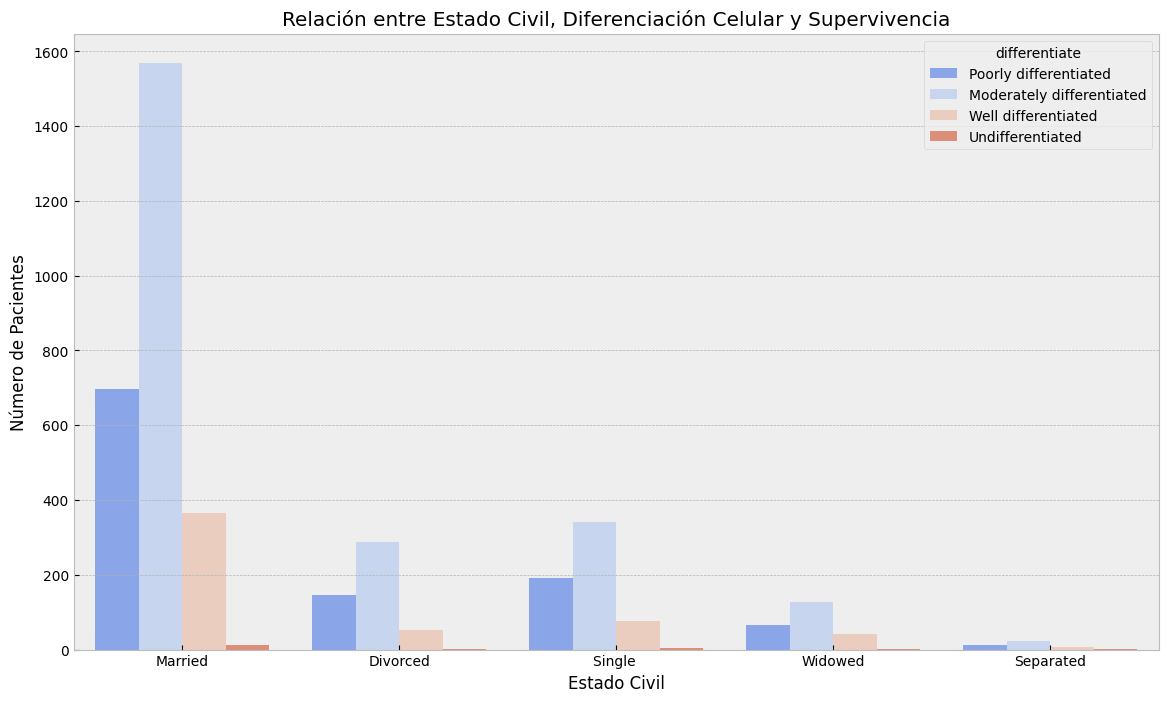

In [129]:
# Relación entre Estado Civil, Diferenciación Celular y Supervivencia
plt.figure(figsize=(14, 8))
sns.countplot(x='Marital Status', hue='differentiate', data=df, palette='coolwarm')
plt.title('Relación entre Estado Civil, Diferenciación Celular y Supervivencia')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Pacientes')
plt.show()

### Evaluando modelos ML (Complementario)

### Generar modelos complementarios
### Exploración y preprocesamiento de datos:
Realiza una exploración detallada de los datos para comprender la distribución de las características y la variable objetivo.

Maneja cualquier valor atípico o dato faltante de manera apropiada.

Convierte las variables categóricas en variables dummy si es necesario.

### División de datos:
Divide el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

### Selección de modelos:
Considera modelos adecuados para la clasificación, como árboles de decisión, Random Forest, Support Vector Machines (SVM), y modelos de regresión logística.

Puedes experimentar con varios modelos para evaluar su rendimiento.

### Entrenamiento y ajuste de hiperparámetros:
Entrena los modelos seleccionados en el conjunto de entrenamiento y ajusta sus hiperparámetros utilizando técnicas como la validación cruzada.

Utiliza métricas de evaluación, como precisión, recall, F1-score y área bajo la curva ROC (AUC-ROC), para comparar el rendimiento de los modelos.

### Evaluación del rendimiento:
Evalúa el rendimiento de los modelos en el conjunto de prueba utilizando las métricas mencionadas anteriormente.

Observa si hay un desequilibrio en la clase objetivo y tenlo en cuenta al interpretar las métricas.

## Identificación de overfitting o underfitting:
Utiliza gráficos de curvas de aprendizaje para observar si hay signos de overfitting o underfitting. Si las curvas de entrenamiento y prueba divergen, podría ser un indicador de overfitting.

Examina las métricas de rendimiento en el conjunto de entrenamiento y prueba. Si la precisión es alta en el conjunto de entrenamiento pero baja en el conjunto de prueba, podría haber overfitting.

### Mejoras potenciales:
Si hay signos de overfitting, considera técnicas como la regularización, la reducción de la complejidad del modelo o la recolección de más datos.

Si hay signos de underfitting, puedes probar con modelos más complejos o ajustar mejor los hiperparámetros.

### Validación cruzada:
Utiliza la validación cruzada para obtener estimaciones más robustas del rendimiento del modelo.

#Identificar por medio de métricas.
### Overfitting:

Señales: El modelo tiene un rendimiento excelente en el conjunto de entrenamiento, pero un rendimiento inferior en el conjunto de prueba.
Métricas afectadas: Precisión, recall, F1-score en el conjunto de prueba.

Posibles causas:
El modelo es demasiado complejo y se ha ajustado demasiado a los datos de entrenamiento.
Pocas muestras de datos o características, lo que permite al modelo memorizar en lugar de generalizar.

Formas de mejora:
Reducir la complejidad del modelo, por ejemplo, ajustando los hiperparámetros o utilizando técnicas de regularización.
Aumentar la cantidad de datos de entrenamiento para proporcionar una visión más completa del espacio de características.

## Underfitting:

Señales: El modelo tiene un rendimiento deficiente tanto en el conjunto de entrenamiento como en el conjunto de prueba.
Métricas afectadas: Precisión, recall, F1-score en ambos conjuntos.

Posibles causas:
El modelo es demasiado simple para capturar la complejidad de los datos.
Pocas iteraciones durante el entrenamiento o falta de ajuste de hiperparámetros.

Formas de mejora:
Aumentar la complejidad del modelo si es necesario, por ejemplo, agregar capas a una red neuronal o aumentar la profundidad de un árbol de decisión.
Ajustar hiperparámetros para encontrar la configuración óptima del modelo.

## Optimización de hiperparámetros:

Señales: Los hiperparámetros no están optimizados, lo que afecta al rendimiento del modelo.
Métricas afectadas: Diversas métricas dependiendo de la configuración de los hiperparámetros.

Posibles causas:
No se han ajustado adecuadamente los hiperparámetros durante el entrenamiento.

Formas de mejora:
Utilizar técnicas de búsqueda de hiperparámetros, como Grid Search o Random Search, para encontrar la combinación óptima.
Realizar validación cruzada para evaluar el rendimiento del modelo en diferentes divisiones de los datos.


Bosque aleatorio Metricas:
Exactitud: 0.8260869565217391
Precisión: 0.5714285714285714
Recordar: 0.13793103448275862
Puntuación F1: 0.2222222222222222
AUC-ROC: 0.557601880877743
Matriz de confusión:
[[645  15]
 [125  20]]

SVM Metricas:
Exactitud: 0.8335403726708075
Precisión: 0.8235294117647058
Recordar: 0.09655172413793103
Puntuación F1: 0.17283950617283952
AUC-ROC: 0.5460031347962383
Matriz de confusión:
[[657   3]
 [131  14]]

Regresión logística Metricas:
Exactitud: 0.8360248447204969
Precisión: 0.7096774193548387
Recordar: 0.15172413793103448
Puntuación F1: 0.25
AUC-ROC: 0.5690438871473354
Matriz de confusión:
[[651   9]
 [123  22]]


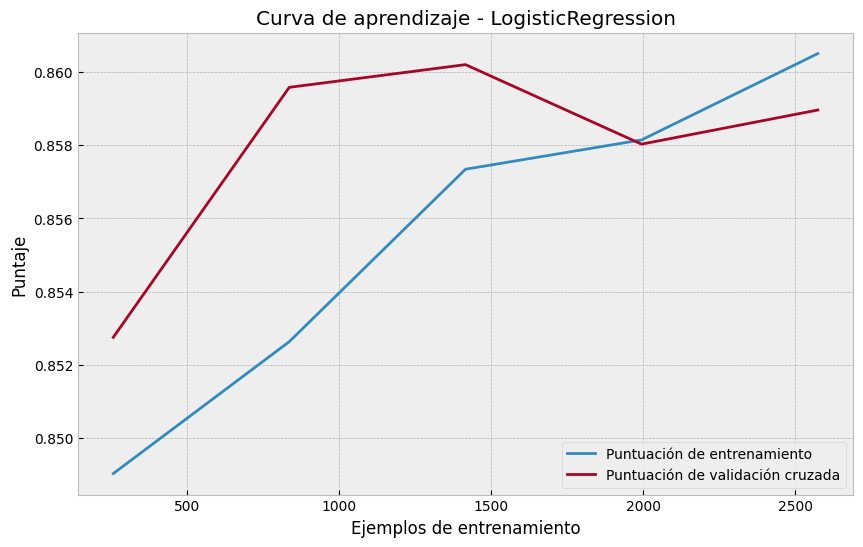

Precisión de validación cruzada: 0.8589627425789438


In [130]:
# Manejo de valores atípicos y datos faltantes
df = df.dropna()  # Eliminar filas con datos faltantes
df = shuffle(df, random_state=42)  # Mezclar los datos

# Codificar variables categóricas con LabelEncoder
label_encoder = LabelEncoder()

# Añade todas las columnas categóricas que necesitas codificar
categorical_columns = ['Race', 'Marital Status', '6th Stage', 'differentiate', 'Estrogen Status', 'Progesterone Status', 'T Stage ', 'N Stage']

# Iterar sobre todas las columnas del DataFrame
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Dividir el conjunto de datos en entrenamiento y prueba
X = df.drop(['Survival Months', 'Status'], axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características para modelos sensibles a la escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selección de modelos
models = {
    'Bosque aleatorio': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Regresión logística': LogisticRegression(random_state=42)
}

# Entrenamiento y ajuste de hiperparámetros
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Evaluación del rendimiento
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{model_name} Metricas:")
    print(f"Exactitud: {accuracy_score(y_test, y_pred)}")
    print(f"Precisión: {precision_score(y_test, y_pred)}")
    print(f"Recordar: {recall_score(y_test, y_pred)}")
    print(f"Puntuación F1: {f1_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
    print(f"Matriz de confusión:\n{confusion_matrix(y_test, y_pred)}")

# Identificación de overfitting o underfitting
# Gráficos de curvas de aprendizaje
def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Puntuación de entrenamiento')
    plt.plot(train_sizes, test_scores_mean, label='Puntuación de validación cruzada')
    plt.title(f'Curva de aprendizaje - {model.__class__.__name__}')
    plt.xlabel('Ejemplos de entrenamiento')
    plt.ylabel('Puntaje')
    plt.legend(loc='best')
    plt.show()

# Ejemplo de uso
plot_learning_curve(models['Regresión logística'], X_train_scaled, y_train)

# Validación cruzada
cv_scores = cross_val_score(models['Regresión logística'], X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Precisión de validación cruzada: {np.mean(cv_scores)}")

# Experimenta y ajusta los modelos y sus parámetros según sea necesario
# Realiza mejoras potenciales y ajusta el código según tus necesidades específicas.

### Estructurando un Proyecto de DS PARTE 3

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Comprobar la dimensión del conjunto de datos
num_row, num_col = df.shape
print('The dataset contains {} rows and {} columns.'.format(num_row, num_col))

# Comprobar los atributos en el conjunto de datos
print('Attributes in the dataset: ', df.columns.values)

# Ver las primeras 5 filas del conjunto de datos
df.head()

The dataset contains 4024 rows and 16 columns.
Attributes in the dataset:  ['Age' 'Race' 'Marital Status' 'T Stage ' 'N Stage' '6th Stage'
 'differentiate' 'Grade' 'A Stage' 'Tumor Size' 'Estrogen Status'
 'Progesterone Status' 'Regional Node Examined' 'Reginol Node Positive'
 'Survival Months' 'Status']


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1718,45,2,1,0,0,0,1,3,1,15,1,1,24,1,80,0
1204,61,2,1,0,0,0,0,2,1,17,1,1,8,1,48,0
2722,61,2,1,1,1,2,0,2,1,28,1,0,32,5,61,0
1937,40,2,1,2,1,2,0,2,1,60,1,1,14,5,53,1
1226,45,2,1,0,0,0,3,1,1,14,1,1,13,1,94,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4024 entries, 1718 to 3174
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status                 

In [133]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=122)

# Comprobar la dimensión del tren y el conjunto de datos de prueba
print('Training data size: ', train.shape)
print('Test data size: ', test.shape)

# Segregar la matriz de características y el vector objetivo
Xtrain = train.drop(columns=['Status'], axis=1)
ytrain = train['Status']

Xtest = test.drop(columns=['Status'], axis=1)
ytest = test['Status']

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

# Codificar el objetivo/etiqueta
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Realizar codificación ordinal para las características ordinales
ordinal_coder = OrdinalEncoder()
ordinal_feats = ['T Stage ','N Stage','6th Stage','differentiate'] # list of ordinal data in the dataset
# Datos de entrenamiento
ordinal_train = ordinal_coder.fit_transform(Xtrain[ordinal_feats])
ordinal_train_df = pd.DataFrame(ordinal_train, columns=ordinal_feats)
# Datos de prueba
ordinal_test = ordinal_coder.transform(Xtest[ordinal_feats])
ordinal_test_df = pd.DataFrame(ordinal_test, columns=ordinal_feats)

# Realizar codificación de etiquetas para mostrar el 'Estado de progesterona'
progesterone_coder = LabelEncoder()
# Datos de entrenamiento
train_progesterone = progesterone_coder.fit_transform(Xtrain['Progesterone Status'])
train_progesterone_df = pd.DataFrame(train_progesterone, columns=['Progesterone Status'])
# Datos de prueba
test_progesterone = progesterone_coder.transform(Xtest['Progesterone Status'])
test_progesterone_df = pd.DataFrame(test_progesterone, columns=['Progesterone Status'])

# Realizar codificación de etiquetas para mostrar el 'Estado de estrógeno'
estrogen_coder = LabelEncoder()
# Datos de entrenamiento
train_estrogen = estrogen_coder.fit_transform(Xtrain['Estrogen Status'])
train_estrogen_df = pd.DataFrame(train_estrogen, columns=['Estrogen Status'])
# Datos de prueba
test_estrogen = estrogen_coder.transform(Xtest['Estrogen Status'])
test_estrogen_df = pd.DataFrame(test_estrogen, columns=['Estrogen Status'])

# Realizar una codificación activa para la característica nominal 'Race'
race_coder = OneHotEncoder(sparse_output=False) # Sparse=False devuelve una matriz numerosa en lugar de una matriz dispersa
# Datos de entrenamiento
train_race = Xtrain['Race'].to_frame()
train_race_encoded = race_coder.fit_transform(train_race)
train_race_df = pd.DataFrame(train_race_encoded, columns=race_coder.get_feature_names_out())
# Datos de prueba
test_race = Xtest['Race'].to_frame()
test_race_encoded = race_coder.transform(test_race)
test_race_df = pd.DataFrame(test_race_encoded, columns=race_coder.get_feature_names_out())

# Realizar una codificación activa para la característica nominal 'Estado civil'
marital_coder = OneHotEncoder(sparse_output=False)
# Datos de entrenamiento
train_marital = Xtrain['Marital Status'].to_frame()
train_marital_encoded = marital_coder.fit_transform(train_marital)
train_marital_df = pd.DataFrame(train_marital_encoded, columns=marital_coder.get_feature_names_out())
# Datos de prueba
test_marital = Xtest['Marital Status'].to_frame()
test_marital_encoded = marital_coder.transform(test_marital)
test_marital_df = pd.DataFrame(test_marital_encoded, columns=marital_coder.get_feature_names_out())

# Realizar una codificación en caliente para la característica nominal 'A Stage'
Astage_coder = OneHotEncoder(sparse_output=False)
# Datos de entrenamiento
train_Astage = Xtrain['A Stage'].to_frame()
train_Astage_encoded = Astage_coder.fit_transform(train_Astage)
train_Astage_df = pd.DataFrame(train_Astage_encoded, columns=Astage_coder.get_feature_names_out())
# Datos de prueba
test_Astage = Xtest['A Stage'].to_frame()
test_Astage_encoded = Astage_coder.transform(test_Astage)
test_Astage_df = pd.DataFrame(test_Astage_encoded, columns=Astage_coder.get_feature_names_out())

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

processed_feats = ['T Stage ','N Stage','6th Stage','differentiate','Progesterone Status','Estrogen Status',
                  'Race','Marital Status','A Stage']
unprocessed_feats = set(Xtrain.columns.tolist()) - set(processed_feats)

# Procesamiento de datos de entrenamiento (codificación).
Xtrain_copy = Xtrain[list(unprocessed_feats)]

Xtrain_processed = pd.concat([Xtrain_copy.reset_index(drop=True), ordinal_train_df, train_progesterone_df, train_estrogen_df,
                             train_race_df, train_marital_df, train_Astage_df], axis=1)

# Procesamiento de datos de prueba (codificación)
Xtest_copy = Xtest[list(unprocessed_feats)]

Xtest_processed = pd.concat([Xtest_copy.reset_index(drop=True), ordinal_test_df, test_progesterone_df, test_estrogen_df,
                             test_race_df, test_marital_df, test_Astage_df], axis=1)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_processed)
Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=Xtrain_processed.columns)

Xtest_scaled = scaler.transform(Xtest_processed)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=Xtrain_processed.columns)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

def featSelection(n_features_to_select, trainData):
    estimator = DecisionTreeClassifier(random_state=122)
    selector = RFE(estimator=estimator, n_features_to_select=n_features_to_select, step=1)
    selector = selector.fit(trainData[0], trainData[1])
    imp_feats = []
    for i, col in zip(range(trainData[0].shape[1]), trainData[0].columns):
        if selector.ranking_[i] == 1:
            imp_feats.append(col)
    print(f'La parte superior {n_features_to_select} Las características seleccionadas del árbol de decisión a través de RFE son: ', imp_feats)

    return imp_feats

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def hyperparameterTuning(imp_feats, trainData):
    # Crear un clasificador de regresión logística
    logreg = LogisticRegression(random_state=122, max_iter=5000)

    # define the hyperparameter grid
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'class_weight' : ['balanced']
    }

    # Crear el objeto GridSearchCV
    grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

    # Ajustar la búsqueda de cuadrícula a los datos
    grid_search_logreg.fit(trainData[0][imp_feats], trainData[1])

    # Orint parámetros y el correspondiente ROC_AUC
    print('Parámetros del ajuste de hiperparámetros: ', grid_search_logreg.best_params_)
    print('Mejor ROC_AUC: ', grid_search_logreg.best_score_)

    # Consigue el mejor modelo
    best_logreg = grid_search_logreg.best_estimator_
    return best_logreg

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Función para evaluar el rendimiento del modelo
def performanceEval(model, imp_feats, trainData, testData):
    ypred_train = model.predict(trainData[0][imp_feats])
    cm_train = confusion_matrix(trainData[1], ypred_train, normalize='true')
    ypred_test = model.predict(testData[0][imp_feats])
    cm_test = confusion_matrix(testData[1], ypred_test, normalize='true')

    target_names = [str(name) for name in ytrain.unique()]  # Convertir a cadenas
    report_train = classification_report(trainData[1], ypred_train, target_names=target_names)
    print('Informe de clasificación para los datos de entrenamiento: ')
    print(report_train)

    report_test = classification_report(testData[1], ypred_test, target_names=target_names)
    print('Informe de clasificación para los datos de prueba: ')
    print(report_test)

    fpr_train, tpr_train, _ = roc_curve(trainData[1], ypred_train)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(testData[1], ypred_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Gráfico de la curva ROC
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Curva ROC de entrenamiento (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Curva ROC de prueba (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva Característica de Operación del Receptor (ROC)', fontsize=20)
    plt.legend(loc='lower right')
    plt.show()

    figure, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_train, annot=True, xticklabels=target_names, yticklabels=target_names, cmap='BuPu', cbar=False, ax=axes[0])
    axes[0].set_title('Entrenamiento', fontsize=20)
    sns.heatmap(cm_test, annot=True, xticklabels=target_names, yticklabels=target_names, cmap='BuPu', cbar=False, ax=axes[1])
    axes[1].set_title('Prueba', fontsize=20)
    plt.tight_layout(pad=5)
    figure.suptitle('Rendimiento del Modelo Entrenado con las Mejores {} Características Seleccionadas'.format(len(imp_feats)), fontsize=20)
    plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

def modelPerformance(n_features_to_select, trainData, testData):
    topFeats = featSelection(n_features_to_select, trainData)
    model = hyperparameterTuning(topFeats, trainData)
    res = performanceEval(model, topFeats, trainData, testData)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------

# definir una lista para almacenar datos de entrenamiento y de prueba
trainData = [Xtrain_scaled, ytrain_encoded]
testData = [Xtest_scaled, ytest_encoded]

Training data size:  (3219, 16)
Test data size:  (805, 16)


La parte superior 5 Las características seleccionadas del árbol de decisión a través de RFE son:  ['Survival Months', 'Reginol Node Positive', 'Age', 'Tumor Size', 'Regional Node Examined']
Parámetros del ajuste de hiperparámetros:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
Mejor ROC_AUC:  0.8540091116235207
Informe de clasificación para los datos de entrenamiento: 
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2722
           1       0.40      0.77      0.53       497

    accuracy                           0.79      3219
   macro avg       0.68      0.78      0.70      3219
weighted avg       0.87      0.79      0.81      3219

Informe de clasificación para los datos de prueba: 
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       686
           1       0.40      0.76      0.52       119

    accuracy                           0.79       805
   m

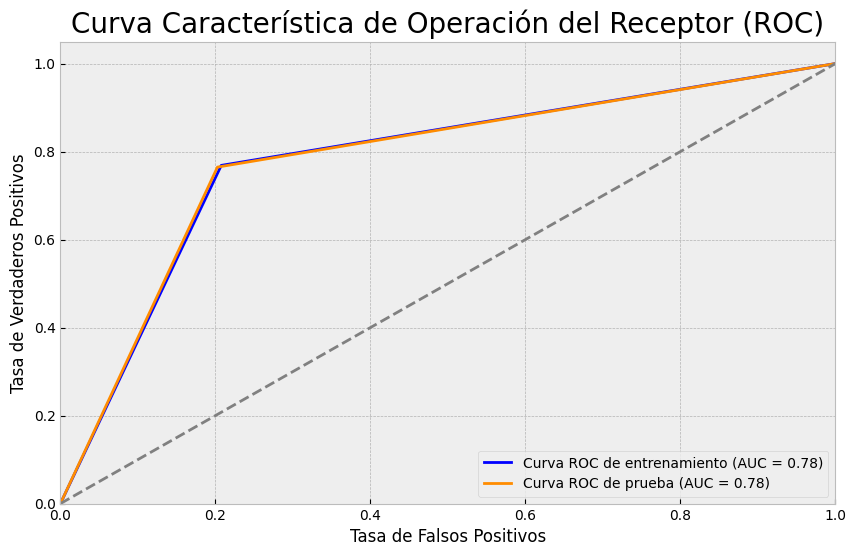

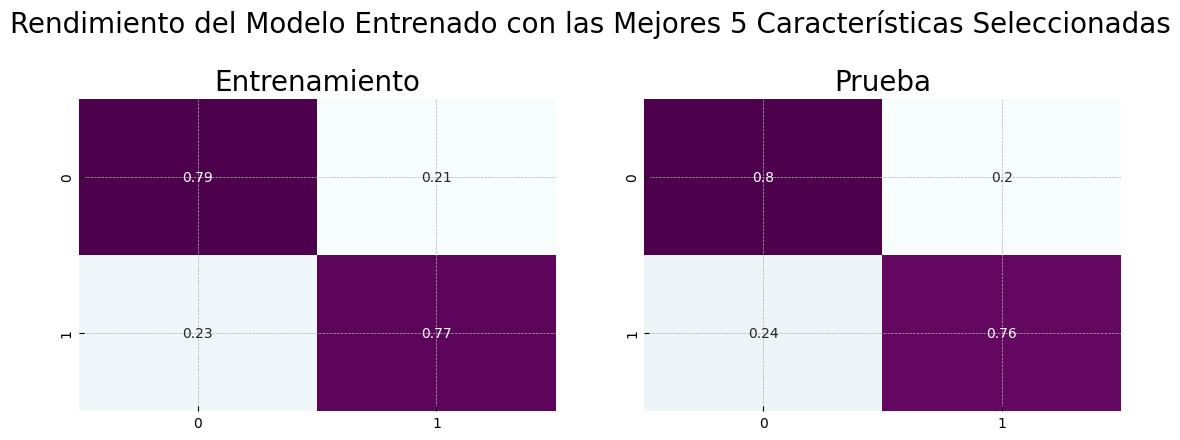

In [134]:
# Rendimiento del modelo entrenado con las 5 características principales seleccionadas a través de RFE
modelPerformance(5, trainData, testData)

La parte superior 20 Las características seleccionadas del árbol de decisión a través de RFE son:  ['Survival Months', 'Reginol Node Positive', 'Grade', 'Age', 'Tumor Size', 'Regional Node Examined', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Progesterone Status', 'Estrogen Status', 'Race_0', 'Race_1', 'Race_2', 'Marital Status_0', 'Marital Status_1', 'Marital Status_2', 'Marital Status_3', 'Marital Status_4']
Parámetros del ajuste de hiperparámetros:  {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Mejor ROC_AUC:  0.8608376325996063
Informe de clasificación para los datos de entrenamiento: 
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2722
           1       0.42      0.77      0.54       497

    accuracy                           0.80      3219
   macro avg       0.68      0.79      0.71      3219
weighted avg       0.87      0.80      0.82      3219

Informe de clasificación para los dato

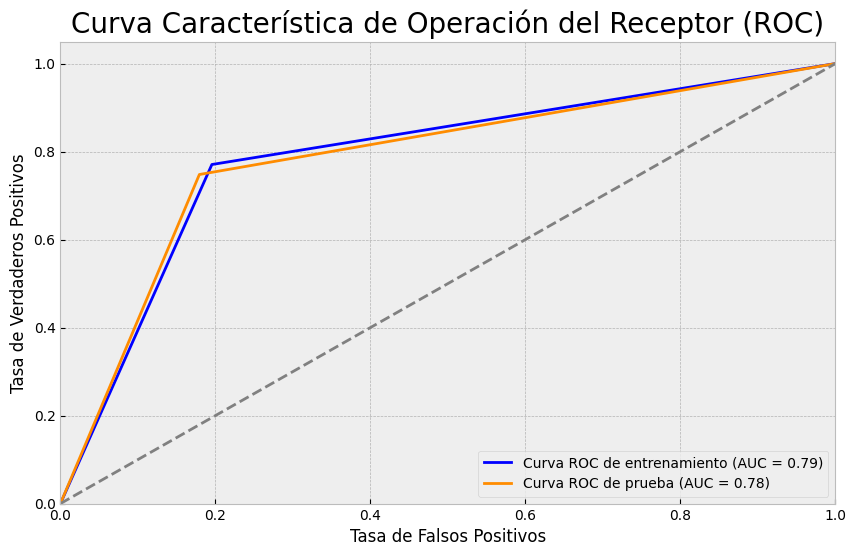

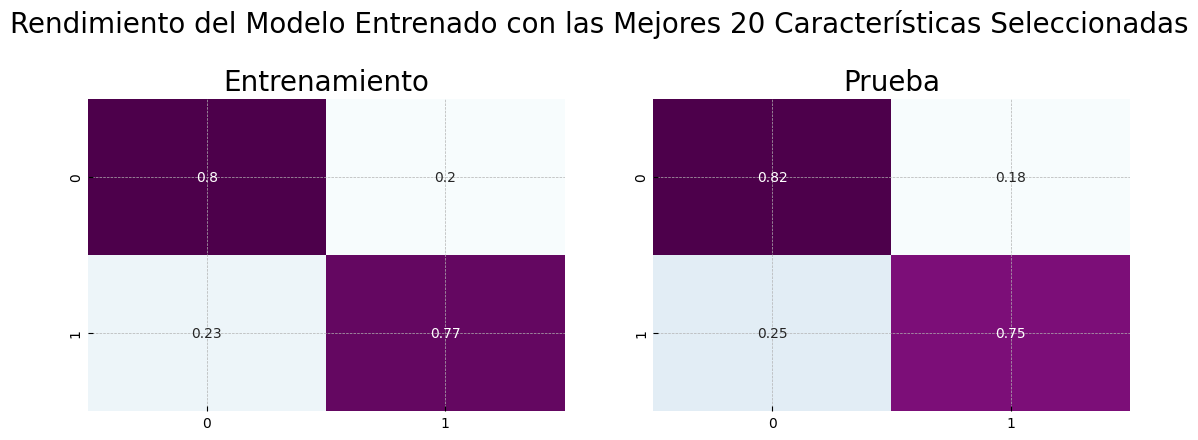

In [135]:
# endimiento del modelo entrenado con las 20 características principales seleccionadas a través de RFE
modelPerformance(20, trainData, testData)

### Modelo de Jupyter Notebook

Jupyter Notebook - Análisis y Modelado de Datos de Cáncer de Mama

1. Abstracto con motivación y audiencia:
Motivación:
Este análisis tiene como objetivo extraer conocimientos valiosos de un conjunto de datos tabulares para informar decisiones prácticas. La motivación radica en aplicar un enfoque alternativo, proporcionando recomendaciones accionables y orientadas a resultados.

Audiencia:
Profesionales de la industria y tomadores de decisiones que buscan insights específicos y aplicables a su contexto. El análisis se centra en ofrecer información práctica derivada de los datos tabulares.

2. Preguntas/Hipótesis:
Eficiencia del Tratamiento:

¿Existen patrones en la eficiencia del tratamiento relacionados con variables específicas?
Segmentación de Pacientes:

¿Es posible identificar grupos específicos de pacientes con características similares que responden de manera similar al tratamiento?
Tendencias Temporales:

¿Se observan tendencias temporales en la eficacia del tratamiento a lo largo del tiempo?

3. Estructura:

Introducción y Motivación:
Descripción del conjunto de datos y cambio en el enfoque.

Objetivos e Hipótesis:
Presentación de las nuevas preguntas e hipótesis.

Exploración de Datos (EDA) - Enfoque Alternativo:
Visualización de nuevas características y relaciones.

Análisis de Segmentación de Pacientes:
Identificación de grupos y evaluación de la respuesta al tratamiento.

Tendencias Temporales en la Eficacia del Tratamiento:
Visualización y análisis de variaciones temporales.

Conclusiones y Recomendaciones Prácticas:
Resumen de hallazgos clave y recomendaciones basadas en nuevas preguntas.

4. Análisis Exploratorio de Datos (EDA):

Exploración de Nuevas Variables:
Identificación de características adicionales relevantes.

Análisis de Correlación y Causalidad:
Investigación de correlaciones y posibles relaciones causales.

Enfoque en Resultados Clínicos:
Visualización de resultados clínicos y su relación con variables seleccionadas.
Este enfoque se centra en brindar una visión general y estructurada, manteniendo la simplicidad y enfocándose en los nuevos aspectos del análisis.

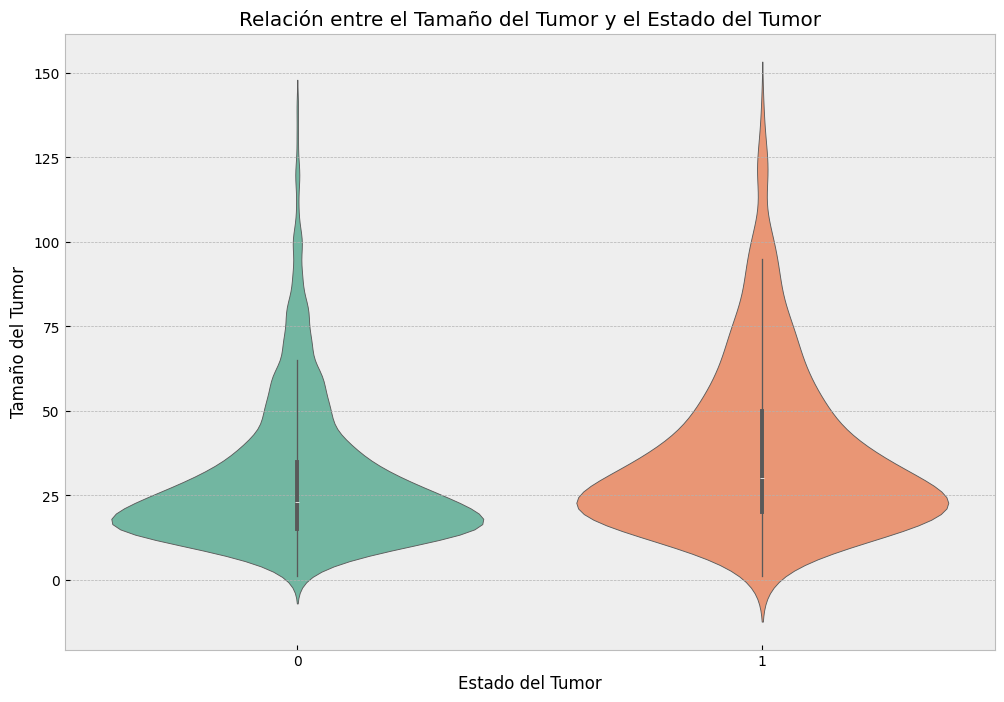

In [136]:
#Relación entre el Tamaño del Tumor y el Estado del Tumor:
#Visualiza la distribución del tamaño del tumor según el estado del tumor.

plt.figure(figsize=(12, 8))
sns.violinplot(x='Status', y='Tumor Size', data=df, palette='Set2')
plt.title('Relación entre el Tamaño del Tumor y el Estado del Tumor')
plt.xlabel('Estado del Tumor')
plt.ylabel('Tamaño del Tumor')
plt.show()

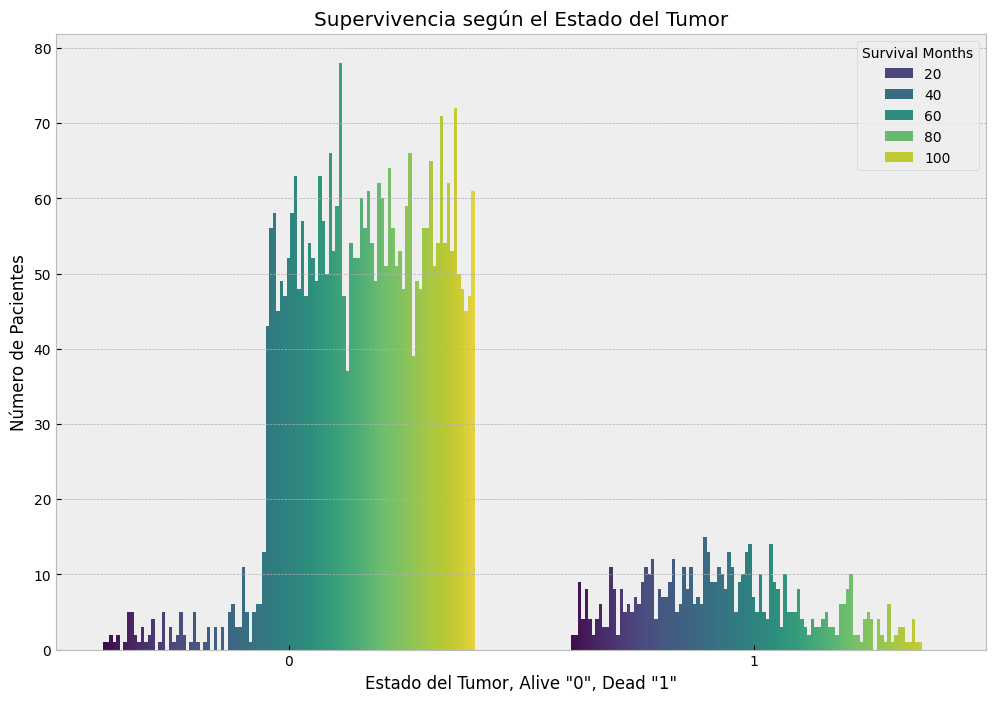

In [137]:
#Comparación de la Supervivencia según el Estado del Tumor:
#Analiza cómo la supervivencia varía entre diferentes estados del tumor.

plt.figure(figsize=(12, 8))
sns.countplot(x='Status', hue='Survival Months', data=df, palette='viridis')
plt.title('Supervivencia según el Estado del Tumor')
plt.xlabel('Estado del Tumor, Alive "0", Dead "1"')
plt.ylabel('Número de Pacientes')
plt.show()

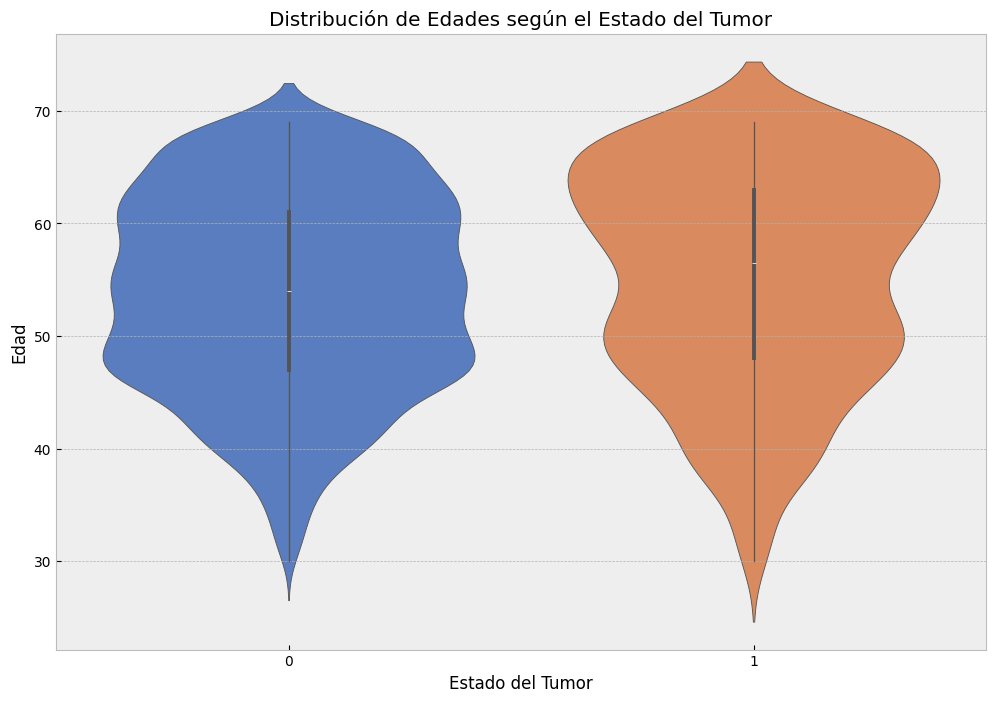

In [138]:
#Distribución de Edades en Diferentes Estados del Tumor:
#Examina cómo se distribuyen las edades en diferentes estados del tumor.

plt.figure(figsize=(12, 8))
sns.violinplot(x='Status', y='Age', data=df, palette='muted')
plt.title('Distribución de Edades según el Estado del Tumor')
plt.xlabel('Estado del Tumor')
plt.ylabel('Edad')
plt.show()

# Proyecto "Cáncer de mama Wisconsin (Diagnóstico)"

### Conectar una API

**Descripción del Conjunto de Datos**

Este conjunto de datos contiene características de la masa mamaria. Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (PAAF) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Esta información se utiliza para predecir si el cáncer es benigno o maligno.

In [139]:
from google.colab import files

In [140]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [141]:
df = pd.read_csv ("/content/gdrive/MyDrive/Colab Notebooks/3. Breast_Cancer/Data_Complementario.csv")
df.shape

(569, 32)

A continuación se muestra una descripción general de los **Atributos Utilizados**:

* ID Número
* Diagnóstico (M = maligno, B = benigno)
* Se calculan diez características de valor real para cada núcleo celular:
  1. Radio: (media de las distancias desde el centro a los puntos del perímetro).
  2. Textura: (desviación estándar de los valores de escala de grises).
  3. Perímetro.
  4. Área.
  5. Suavidad: (variación local en longitudes de radio).
  6. Compacidad: (perímetro^2 / área - 1,0).
  7. Concavidad: (severidad de las porciones cóncavas del contorno).
  8. Puntos Cóncavos: (número de porciones cóncavas del contorno).
  9. Simetría.
  10. Dimensión Fractal: ("aproximación de la línea costera" - 1).

* Para cada imagen se calcularon la media, el error estándar y el "peor" o mayor (media de los tres valores más grandes), lo que dio como resultado 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE y el campo 23 es Peor radio.

* Todos los valores de las características se recodifican con cuatro dígitos significativos.

* Valores de atributos faltantes: ninguno
Distribución de clases: 357 benignos, 212 malignos

### Descripción General de los Datos

* Total de muestras: 569
* Diagnósticos: 357 benignos, 212 malignos
* Atributos sin valores faltantes
* Valores recodificados con cuatro dígitos significativos

### Exploración de Datos
* Media de Radio vs. Textura: Se puede usar un gráfico de dispersión para visualizar la distribución de los diagnósticos.
* Mapa de Calor de Correlaciones: Ayuda a identificar las características con mayor influencia en la clasificación.

### Análisis de Datos
* Las características de concavidad y puntos cóncavos muestran una relación significativa con la malignidad de las masas mamarias.
* Se utilizan visualizaciones impactantes como gráficos de dispersión y mapas de calor para presentar hallazgos.

### Conclusiones
* Los análisis indican que ciertos atributos, como la concavidad y los puntos cóncavos, son críticos para predecir la malignidad.
* Estos hallazgos pueden mejorar la precisión y la rapidez del diagnóstico del cáncer de mama.

In [142]:
df.head (20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


### Descripción General de los Datos

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [144]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualización de la Distribución del Diagnóstico


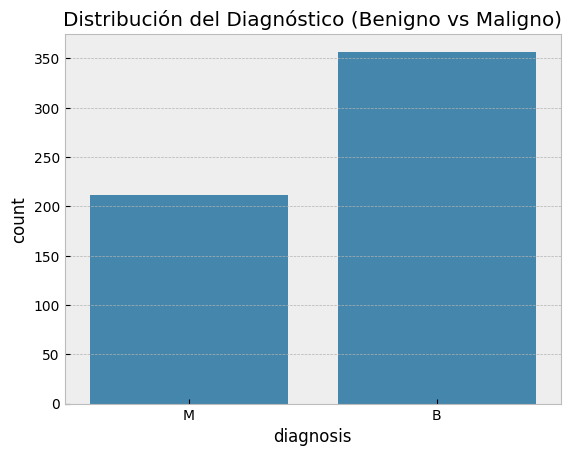

In [145]:
sns.countplot(data=df, x='diagnosis')
plt.title('Distribución del Diagnóstico (Benigno vs Maligno)')
plt.show()

### Data Storytelling

**Inicio**: En el ámbito de la medicina, las decisiones críticas para la salud de las personas pueden revolucionarse con la ayuda de datos precisos y análisis avanzados. Este conjunto de datos nos proporciona la oportunidad de mejorar el diagnóstico del cáncer de mama.

**Nudo**: Con una variedad de características que describen núcleos celulares en imágenes de aspiraciones, cada atributo podría ser clave para predecir si una masa es benigna o maligna. ¿Cómo podemos utilizar esta información de manera efectiva?

**Desarrollo**: Explorando características relevantes, identificamos relaciones significativas entre atributos como la textura y la concavidad con la malignidad. Utilizando visualizaciones, mostramos cómo estas características pueden ayudar en la clasificación.

**Desenlace**: Imaginemos un futuro donde, gracias a estos datos, los diagnósticos sean más precisos y tempranos, salvando vidas y ofreciendo mayor tranquilidad a los pacientes. Estos datos no son solo números, sino una herramienta poderosa en la lucha contra el cáncer.

**Elevator Pitch**: ¿Qué pasaría si pudiéramos predecir el cáncer de mama con mayor precisión? Con este conjunto de datos, estamos un paso más cerca de ese objetivo. Exploramos características celulares para desvelar secretos que podrían salvar vidas.

### Preguntas de Hipótesis
  1. ¿Existe una relación entre el tamaño medio de la masa mamaria y su diagnóstico de benigno o maligno?
  2. ¿Las características relacionadas con la textura de la masa mamaria pueden predecir su malignidad?
  3. ¿Hay alguna correlación entre la suavidad de la masa mamaria y su diagnóstico de cáncer?
  4. ¿Las masas mamarias con mayor compacidad tienden a ser más malignas?
  5. ¿La concavidad de la masa mamaria está relacionada con la severidad de su diagnóstico?
  6. ¿Existen diferencias significativas en la distribución de diagnósticos según las diferentes características?

### Librerias.

In [146]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    # Importar Numpy
import pandas as pd                   # Importar Pandas
import scipy as sp
from prettytable import PrettyTable

# Gráficos
# ==============================================================================
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

#import probscale
#import matplotlib.font_manager
#from matplotlib import style

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #para separar en train y test
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# REGRESCIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# ARBOL DEL DECISION
from sklearn.tree import DecisionTreeClassifier
# XGBOOST
import xgboost

# Métricas
# ==============================================================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
%config IPCompleter.greedy=True
# ==============================================================================
import xlrd
import seaborn as sb
from matplotlib.ticker import PercentFormatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
# ==============================================================================

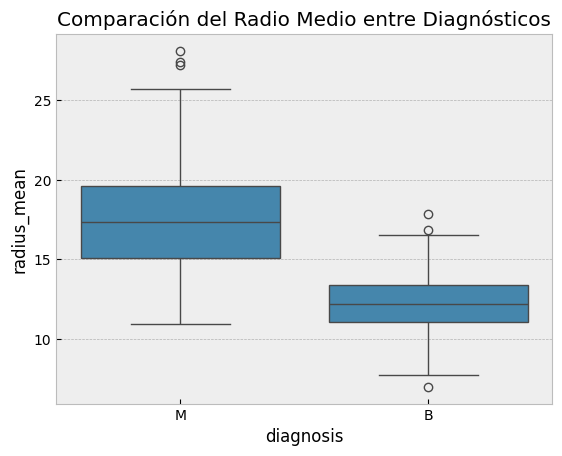

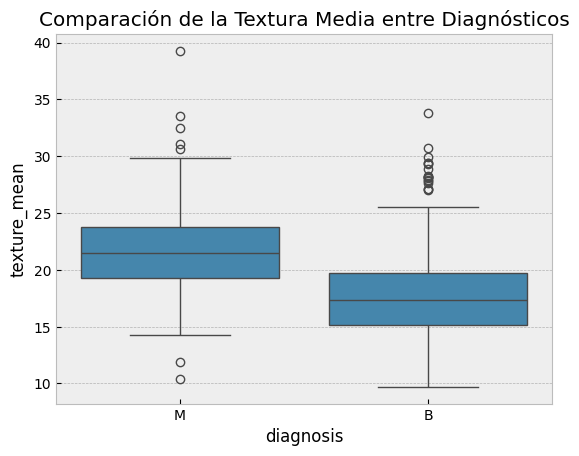

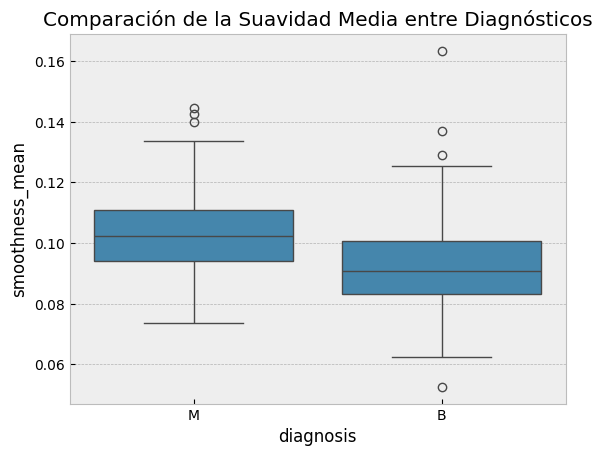

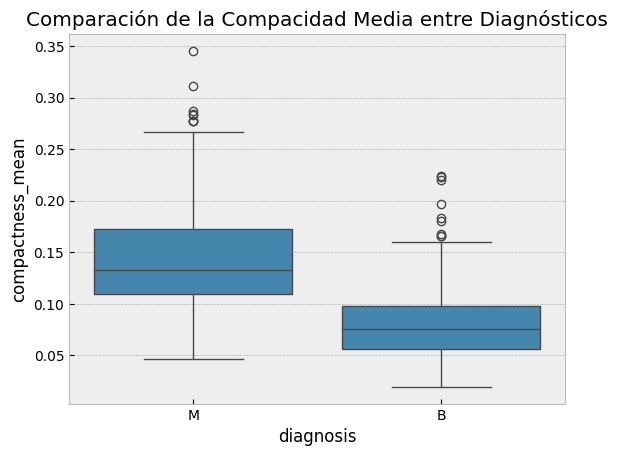

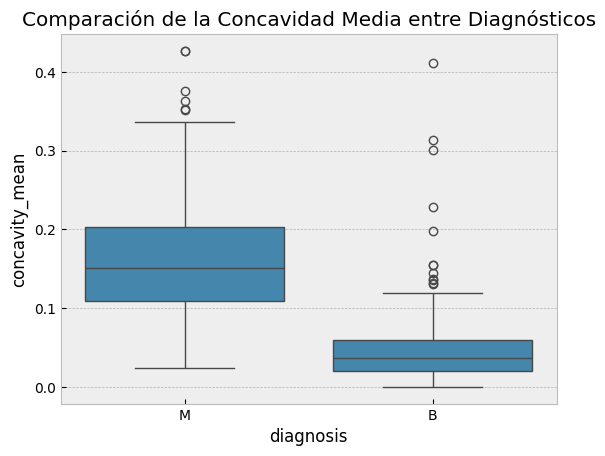

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,0.046058,0.043442,0.00000,0.020310,0.03709,0.05999,0.4108
M,212.0,0.160775,0.075019,0.02398,0.109525,0.15135,0.20305,0.4268


In [147]:
# Pregunta de Hipótesis 1: Relación entre el Tamaño Medio de la Masa Mamaria y su Diagnóstico
# Comparación del radio medio entre diagnósticos
sns.boxplot(data=df, x='diagnosis', y='radius_mean')
plt.title('Comparación del Radio Medio entre Diagnósticos')
plt.show()
# Estadística descriptiva
df.groupby('diagnosis')['radius_mean'].describe()

# Pregunta de Hipótesis 2: Textura y Malignidad
# Comparación de la textura media entre diagnósticos
sns.boxplot(data=df, x='diagnosis', y='texture_mean')
plt.title('Comparación de la Textura Media entre Diagnósticos')
plt.show()
# Estadística descriptiva
df.groupby('diagnosis')['texture_mean'].describe()

# Pregunta de Hipótesis 3: Suavidad y Diagnóstico
# Comparación de la suavidad media entre diagnósticos
sns.boxplot(data=df, x='diagnosis', y='smoothness_mean')
plt.title('Comparación de la Suavidad Media entre Diagnósticos')
plt.show()
# Estadística descriptiva
df.groupby('diagnosis')['smoothness_mean'].describe()

# Pregunta de Hipótesis 4: Compacidad y Malignidad
# Comparación de la compacidad media entre diagnósticos
sns.boxplot(data=df, x='diagnosis', y='compactness_mean')
plt.title('Comparación de la Compacidad Media entre Diagnósticos')
plt.show()
# Estadística descriptiva
df.groupby('diagnosis')['compactness_mean'].describe()

# Pregunta de Hipótesis 5: Concavidad y Severidad del Diagnóstico
# Comparación de la concavidad media entre diagnósticos
sns.boxplot(data=df, x='diagnosis', y='concavity_mean')
plt.title('Comparación de la Concavidad Media entre Diagnósticos')
plt.show()
# Estadística descriptiva
df.groupby('diagnosis')['concavity_mean'].describe()

### Análisis Univariado

In [148]:
# Estadísticas descriptivas
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

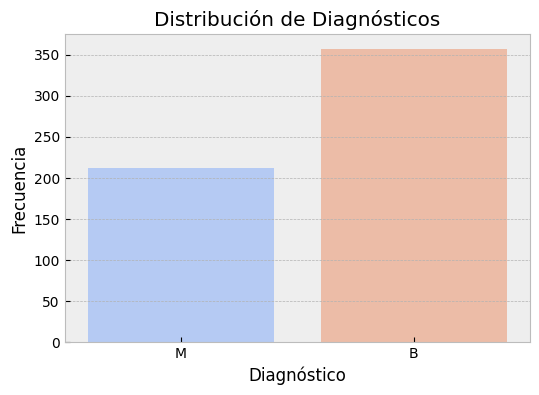

In [149]:
# Distribución de la variable objetivo (Diagnóstico):
# Conteo de diagnósticos
diagnosis_count = df['diagnosis'].value_counts()

# Graficar el conteo
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title('Distribución de Diagnósticos')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico muestra la distribución de los diagnósticos en el conjunto de datos, es decir, cuántas instancias hay de cada tipo de diagnóstico (benigno o maligno).

Explicación: El gráfico de barras muestra que la mayoría de los diagnósticos en el conjunto de datos son de tipo 'B' (benigno), con una frecuencia mayor que los diagnósticos de tipo 'M' (maligno).

Esto indica que el conjunto de datos está desbalanceado, lo cual es importante tener en cuenta al realizar análisis o modelos predictivos, ya que puede afectar la capacidad del modelo para generalizar correctamente.

Interpretación: Al observar este gráfico, es evidente que hay una cantidad significativamente mayor de diagnósticos benignos en comparación con los malignos en el conjunto de datos.

Esto puede influir en cómo se interpretan los resultados de análisis posteriores y en cómo se deben manejar los desafíos asociados con conjuntos de datos desbalanceados al construir modelos predictivos.

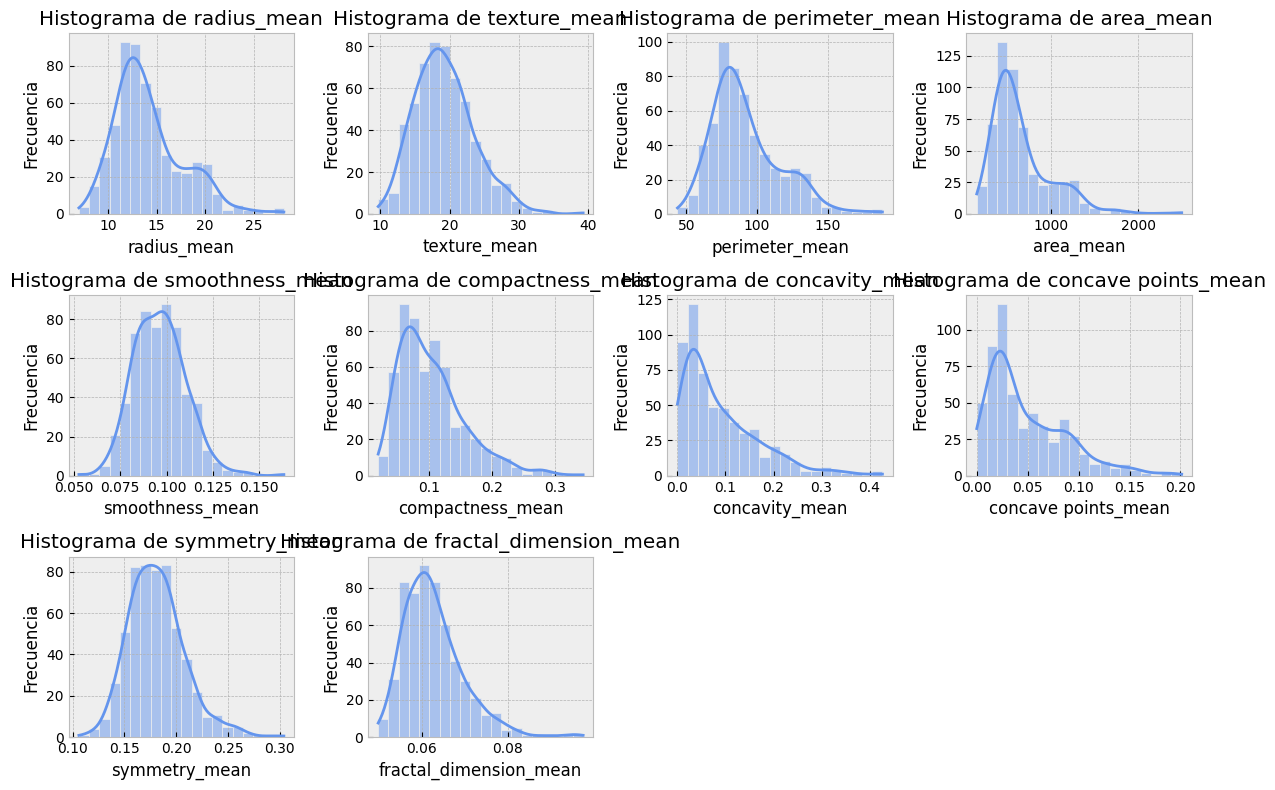

In [150]:
# Histogramas de las características
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[2:12], 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], bins=20, kde=True, color='#6495ED')
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Estos histogramas muestran la distribución de cada característica en el conjunto de datos, representando cuántas veces aparece cada valor o rango de valores en la característica.

Explicación: Cada histograma representa la distribución de una característica específica. Por ejemplo, el histograma de radius_mean muestra que la mayoría de las masas mamarias tienen un radio medio entre aproximadamente 7 y 20, con una concentración mayor alrededor de 12-15. El histograma de texture_mean indica que la textura media varía, con una mayor concentración alrededor de 18-20.

Interpretación: Estos histogramas proporcionan información sobre la distribución de cada característica en el conjunto de datos. Al observar estos gráficos, puedes obtener una idea de la dispersión y la variabilidad de cada característica, lo cual es útil para comprender mejor la naturaleza de los datos y puede ser importante al seleccionar características para análisis posteriores o modelado predictivo.

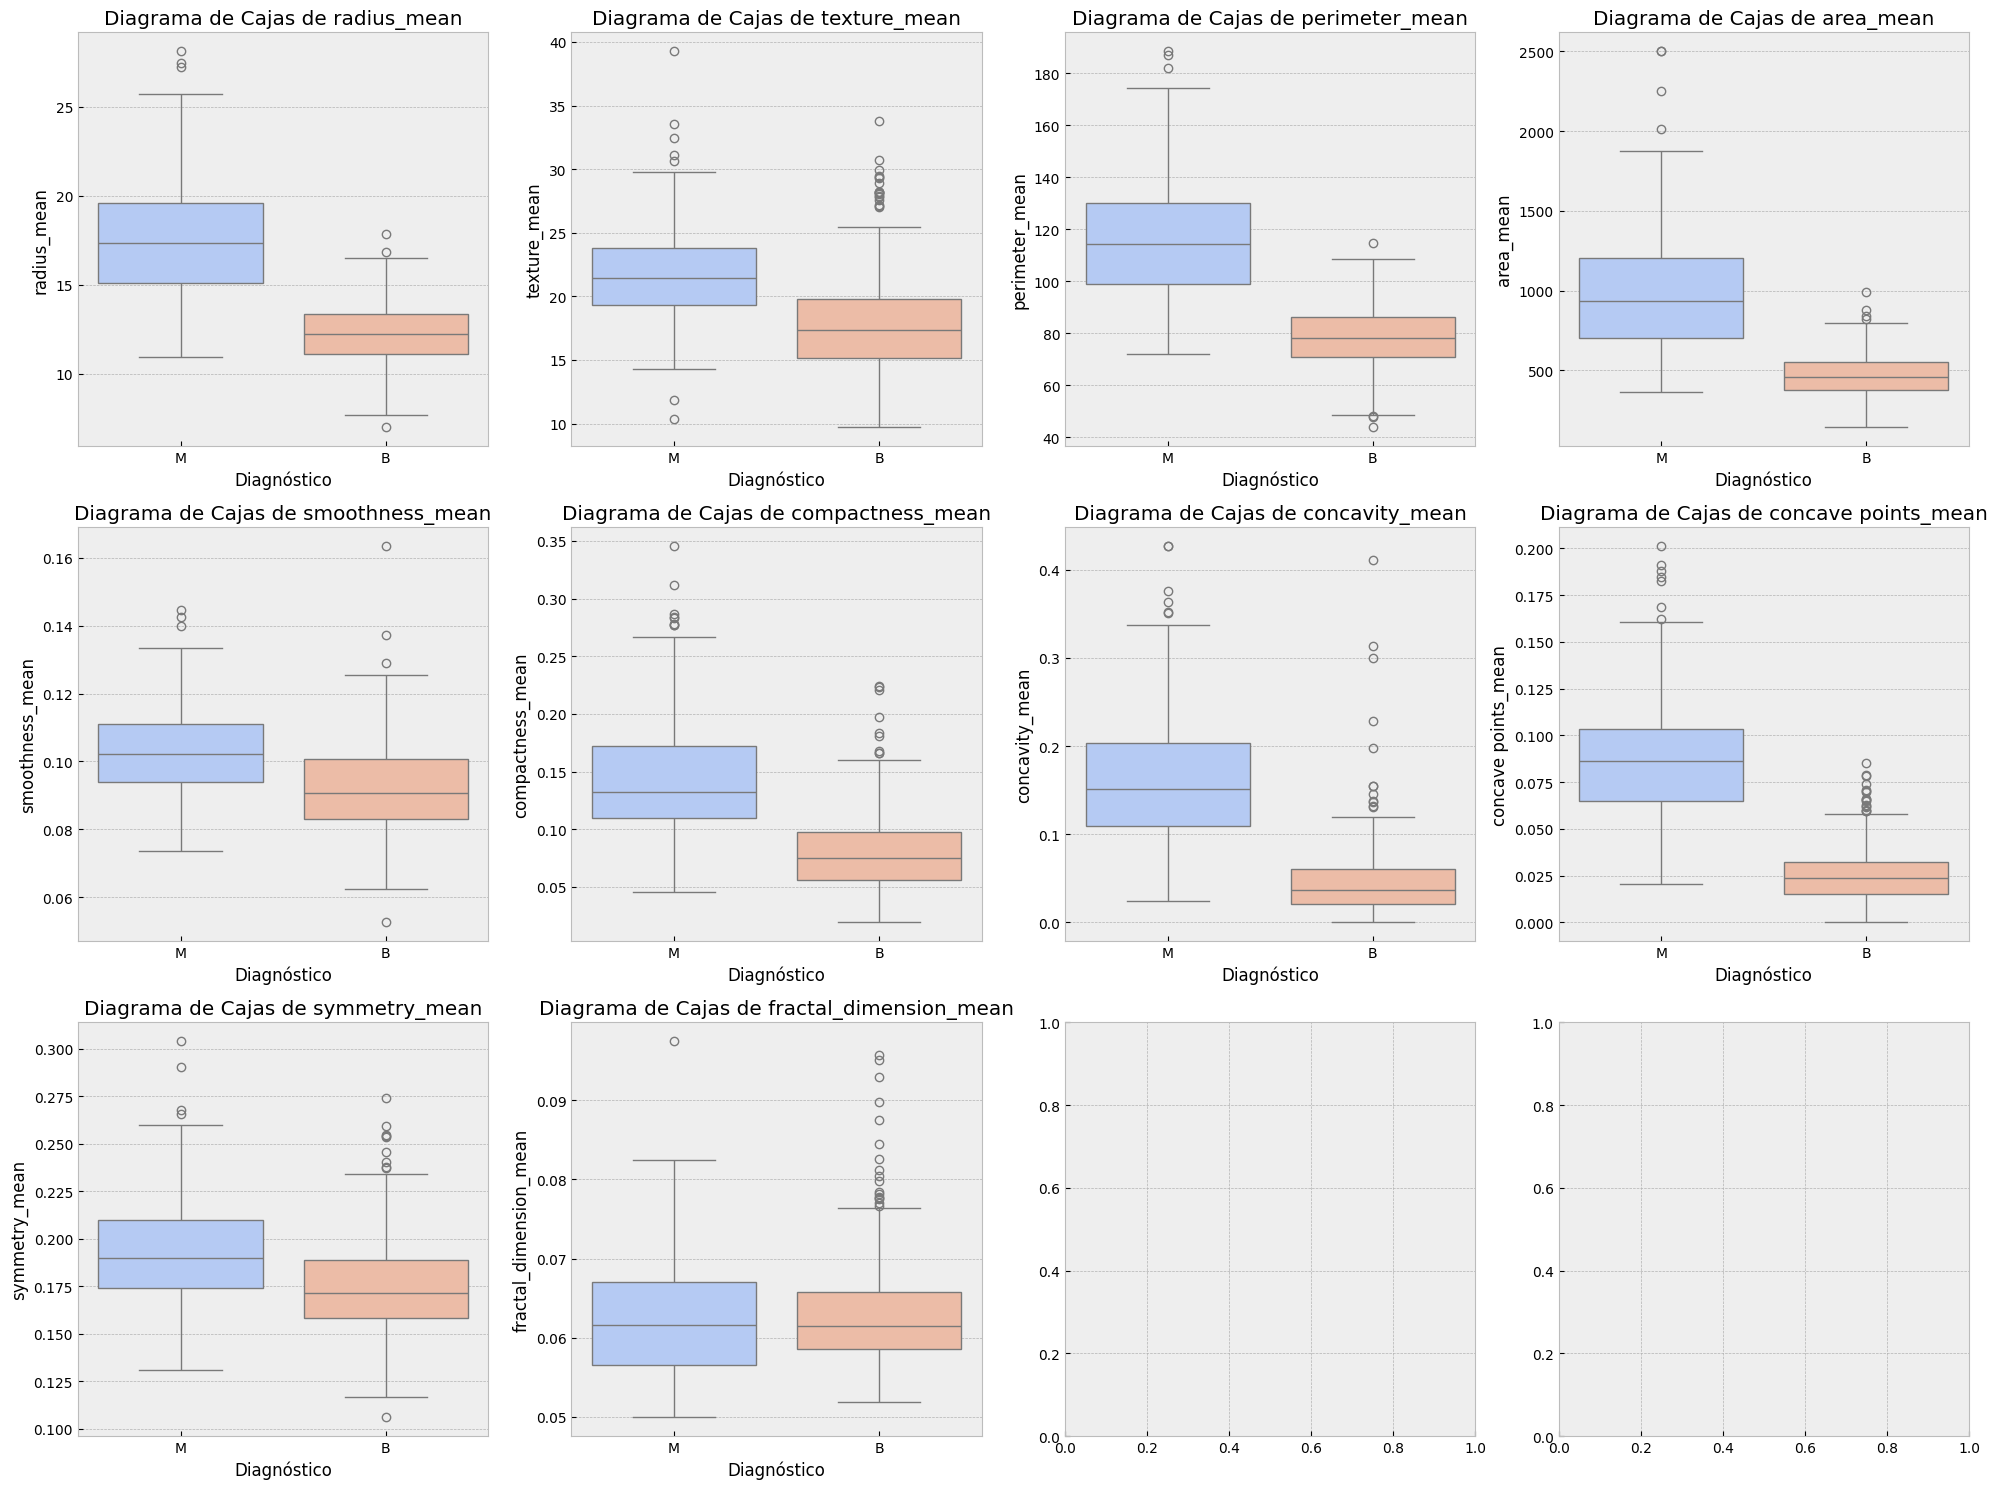

In [151]:
# Diagrama de cajas de las características
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.ravel()

# Iterar sobre las características y crear un boxplot para cada una
for i, feature in enumerate(df.columns[2:12]):
    sns.boxplot(x=df['diagnosis'], y=df[feature], ax=axs[i], palette='coolwarm')
    axs[i].set_title(f'Diagrama de Cajas de {feature}')
    axs[i].set_xlabel('Diagnóstico')
    axs[i].set_ylabel(feature)
plt.tight_layout()
plt.show()

Estos diagramas de cajas muestran la distribución de cada característica en el conjunto de datos, separando los datos por el diagnóstico (benigno o maligno) para comparar las distribuciones entre los dos grupos.

Explicación: Cada diagrama de cajas representa la distribución de una característica específica, dividida en dos categorías según el diagnóstico. Por ejemplo, el diagrama de cajas de radius_mean muestra la distribución de los radios medios de las masas mamarias benignas y malignas. Permite comparar visualmente la mediana, los cuartiles y los valores atípicos de cada grupo.

Interpretación: Estos diagramas de cajas proporcionan información sobre cómo cada característica difiere entre los diagnósticos benignos y malignos. Por ejemplo, si observas un diagrama de cajas donde la mediana de una característica es significativamente mayor para los diagnósticos malignos que para los benignos, eso sugiere que esa característica podría ser un indicador importante para distinguir entre los dos tipos de diagnóstico.


### Análisis Bivariado

In [152]:
# Relación entre características usando pairplot
# Pairplot de las características coloreadas por diagnóstico
sns.pairplot(df.iloc[:, 1:12], hue='diagnosis', palette='coolwarm')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Este pairplot muestra una matriz de diagramas de dispersión para cada par de características en el conjunto de datos, donde cada punto en el diagrama de dispersión representa una instancia de datos. Los puntos están coloreados según el diagnóstico (benigno o maligno), lo que permite visualizar cómo se distribuyen los datos según el diagnóstico en diferentes combinaciones de características.

Explicación: Cada fila y columna en la matriz de pairplot representa una característica en el conjunto de datos. Los diagramas de dispersión en la diagonal principal muestran la distribución de cada característica, mientras que los diagramas de dispersión fuera de la diagonal principal muestran la relación entre pares de características. Los puntos se colorean según el diagnóstico, lo que facilita la identificación de patrones visuales relacionados con el diagnóstico.

Interpretación: Al observar este pairplot, puedes identificar visualmente cualquier patrón o relación entre las características que pueda estar relacionado con el diagnóstico. Por ejemplo, si ves que los puntos de un determinado par de características están claramente separados por color (benigno vs. maligno), eso sugiere que esas dos características podrían ser útiles para distinguir entre los dos tipos de diagnóstico.

### Machine Learning

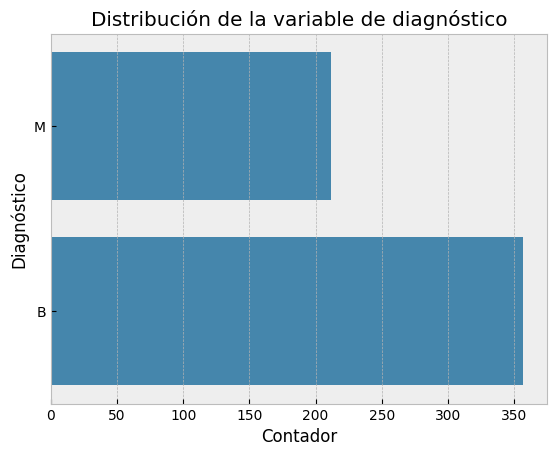

Exactitud: 0.9649122807017544
Matriz de Confusión:
[[70  1]
 [ 3 40]]
Informe de Clasificaciónt:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



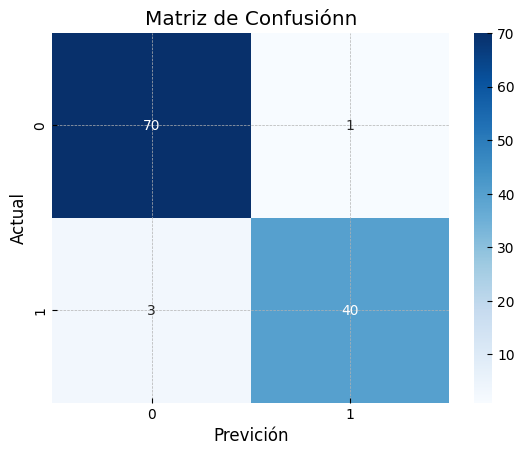

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Exactitud: 0.9649122807017544
area_worst: 0.15389236463205394
concave points_worst: 0.14466326620735528
concave points_mean: 0.10620998844591638
radius_worst: 0.07798687515738047
concavity_mean: 0.06800084191430111
perimeter_worst: 0.06711483267839194
perimeter_mean: 0.053269746128179675
radius_mean: 0.048703371737755234
area_mean: 0.04755500886018552
concavity_worst: 0.031801595740040434
area_se: 0.022406960160458473
texture_worst: 0.021749011006763207
compactness_worst: 0.020266035899623565
radius_se: 0.02013891719419153
compactness_mean: 0.013944325074050485
texture_mean: 0.013590877656998469
perimeter_se: 0.01130301388178435
smoothness_worst:

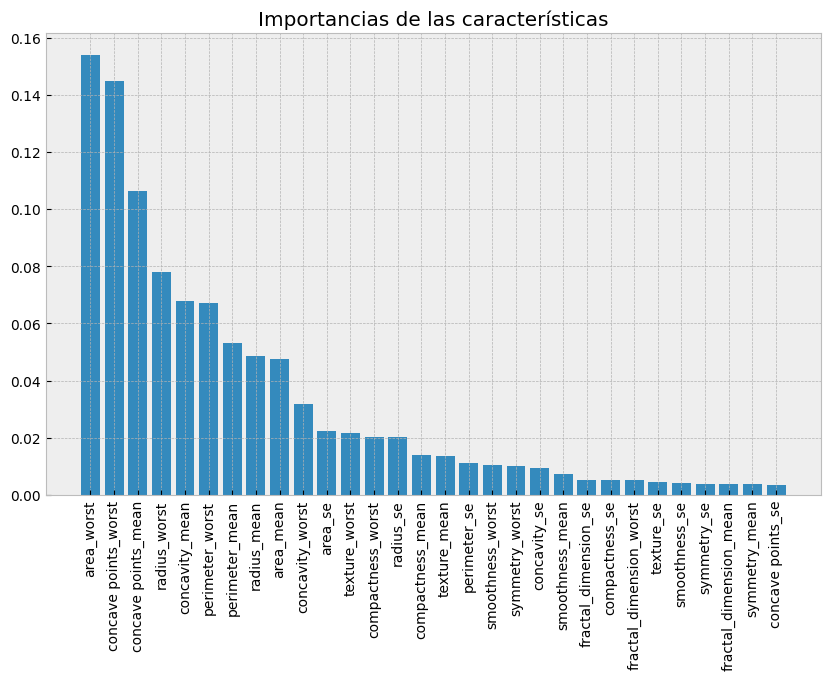

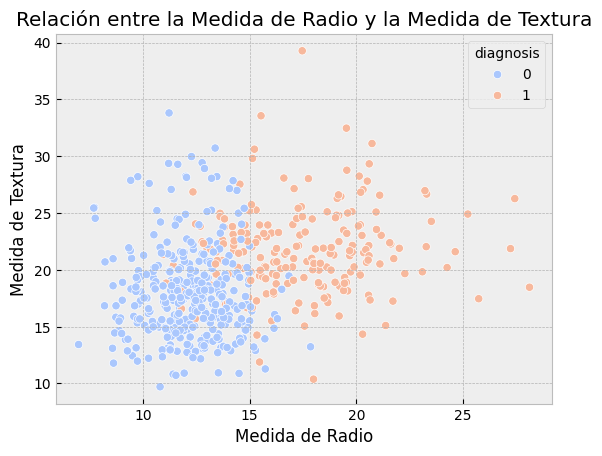

In [153]:
# Distribución de la variable de diagnóstico
sns.countplot(df['diagnosis'])
plt.xlabel('Contador')
plt.ylabel('Diagnóstico')
plt.title('Distribución de la variable de diagnóstico')
plt.show()

# Codificar la variable de diagnóstico
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

# Separar las características y la variable objetivo
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("Informe de Clasificaciónt:")
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previción')
plt.ylabel('Actual')
plt.title('Matriz de Confusiónn')
plt.show()

# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Exactitud: {accuracy_score(y_test, y_pred)}')

# Importancia de las características
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprimir las características más importantes
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

# Visualización de las características más importantes
plt.figure(figsize=(10,6))
plt.title('Importancias de las características')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Gráfico de dispersión para algunas características importantes
sns.scatterplot(x=X['radius_mean'], y=X['texture_mean'], hue=y, palette='coolwarm')
plt.xlabel('Medida de Radio')
plt.ylabel('Medida de Textura')
plt.title('Relación entre la Medida de Radio y la Medida de Textura')
plt.show()

### Evaluando modelos de Machine Learning

1. Segunda Ronda de Feature Engineering
Ampliación de variables: Se realizaron nuevas transformaciones sobre las variables originales utilizando PolynomialFeatures para generar interacciones de segundo grado entre las características.

2. Ronda de Entrenamiento con Más Variables
* Entrenamiento del modelo: Se entrenó un modelo de clasificación RandomForestClassifier con el conjunto de datos ampliado, que incluye las nuevas características generadas.
* Evaluación del modelo: Se calculó la precisión del modelo en el conjunto de prueba y se realizó una curva ROC para evaluar el rendimiento del modelo.

3. Curva ROC
Generación de la curva ROC: Se generó y graficó la curva ROC, incluyendo el cálculo del área bajo la curva (AUC) para evaluar la capacidad del modelo para discriminar entre clases positivas y negativas.

Muestra la correlación entre cada característica y la variable objetivo (diagnóstico), representada por el coeficiente de correlación. Esto nos permitirá identificar las características que tienen una relación más fuerte con la malignidad del cáncer de mama.

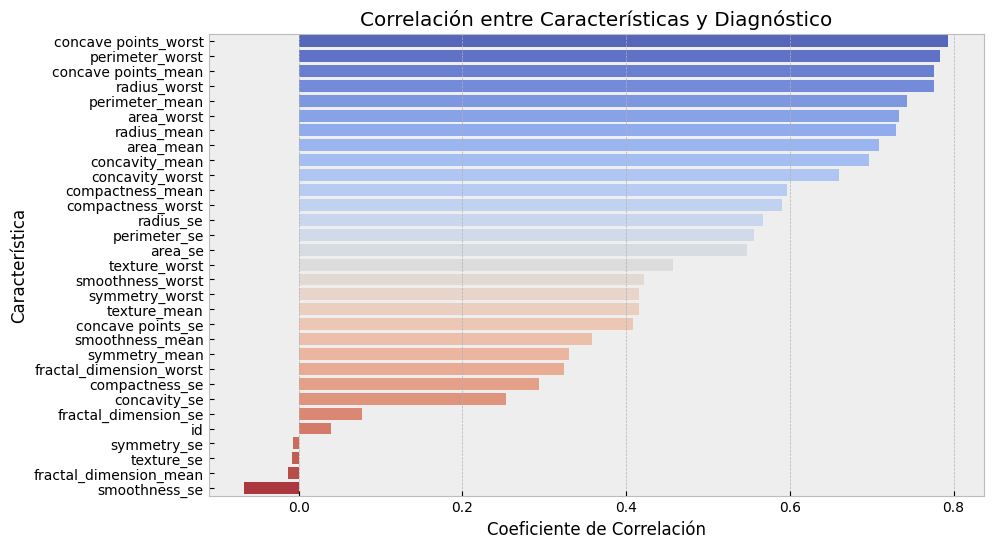

In [154]:
# Correlación entre características y variable objetivo (diagnóstico)
correlation_matrix = df.corr()
diagnosis_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)

# Visualización de las correlaciones más altas
plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_correlation.drop('diagnosis').values, y=diagnosis_correlation.drop('diagnosis').index, palette='coolwarm')
plt.title('Correlación entre Características y Diagnóstico')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Característica')
plt.show()

Creamos nuevas características multiplicando pares de características entre sí y las agregamos al conjunto de datos. Esto nos permitirá capturar posibles interacciones no lineales entre las características originales.

In [155]:
# Crear nuevas características mediante la aplicación de logaritmos a las características existentes
for feature in X.columns:
    new_feature_name = f"log_{feature}"
    X[new_feature_name] = np.log1p(X[feature])

# Mostrar las nuevas características creadas
print("Nuevas características creadas:")
print(X.head())


Nuevas características creadas:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  log_radius_worst  log_textur

Imputamos los valores faltantes utilizando la mediana de cada columna y luego entrenamos un nuevo modelo de clasificación (Random Forest) con los datos imputados.Luego, evaluamos el rendimiento del modelo con los datos imputados.

In [156]:
# Imputar los valores faltantes con la mediana de cada columna
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convertir el resultado de la imputación nuevamente en un DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Dividir los datos imputados en conjuntos de entrenamiento y prueba
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

# Entrenar un nuevo modelo de clasificación (Random Forest) con los datos imputados
model_imputed = RandomForestClassifier(random_state=42)
model_imputed.fit(X_train_imp, y_train_imp)

# Realizar predicciones
y_pred_imp = model_imputed.predict(X_test_imp)

# Evaluar el modelo
print("Exactitud:", accuracy_score(y_test_imp, y_pred_imp))
print("Matriz de Confusión:")
print(confusion_matrix(y_test_imp, y_pred_imp))
print("Informe de Clasificación:")
print(classification_report(y_test_imp, y_pred_imp))



Exactitud: 0.9649122807017544
Matriz de Confusión:
[[70  1]
 [ 3 40]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Ajustará el clasificador Random Forest Classifier utilizando GridSearchCV para explorar diferentes combinaciones de hiperparámetros (número de árboles y profundidad máxima) y encontrará la combinación que maximiza la precisión en un conjunto de validación cruzada. Se entrenará un nuevo modelo con los mejores hiperparámetros encontrados y se evaluará su rendimiento en el conjunto de prueba.

In [157]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30]   # Profundidad máxima de los árboles
}

# Inicializar el clasificador RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener la mejor puntuación de precisión
best_score = grid_search.best_score_
print("Mejor puntuación de precisión encontrada:", best_score)

# Entrenar un nuevo modelo RandomForestClassifier con los mejores hiperparámetros
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Realizar predicciones con el nuevo modelo
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluar el rendimiento del modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Exactitud del modelo ajustado:", accuracy_best)


Mejores hiperparámetros encontrados: {'max_depth': None, 'n_estimators': 200}
Mejor puntuación de precisión encontrada: 0.9626373626373625
Exactitud del modelo ajustado: 0.9649122807017544


### Crossvalidation y mejora de modelos de ML

Paso 1: Aplicar Validación Cruzada
Primero, utilizaremos la validación cruzada con 5 pliegues (folds) para evaluar el rendimiento del modelo Random Forest con las mismas variables que en el desafío anterior.

In [158]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Inicializar el clasificador RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Aplicar validación cruzada con 5 pliegues (folds)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("Puntuaciones de validación cruzada:", cv_scores)
print("Precisión media:", np.mean(cv_scores))
print("Desviación estándar:", np.std(cv_scores))

Puntuaciones de validación cruzada: [0.92982456 0.94736842 0.98245614 0.98245614 0.98230088]
Precisión media: 0.9648812296227295
Desviación estándar: 0.02216694754255281


Paso 2: Optimización de Hiperparámetros con GridSearchCV
Luego, ajustaremos los hiperparámetros del modelo utilizando GridSearchCV y volveremos a entrenar y evaluar el modelo.

In [159]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30]   # Profundidad máxima de los árboles
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener la mejor puntuación de precisión
best_score = grid_search.best_score_
print("Mejor puntuación de precisión encontrada:", best_score)


Mejores hiperparámetros encontrados: {'max_depth': None, 'n_estimators': 200}
Mejor puntuación de precisión encontrada: 0.9626373626373625


Paso 3: Entrenamiento y Evaluación del Modelo Mejorado

In [160]:
# Entrenar un nuevo modelo RandomForestClassifier con los mejores hiperparámetros
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Realizar predicciones con el nuevo modelo
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluar el rendimiento del modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Exactitud del modelo ajustado:", accuracy_best)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_best))
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred_best))


Exactitud del modelo ajustado: 0.9649122807017544
Matriz de Confusión:
[[70  1]
 [ 3 40]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Paso 4: Análisis de los Resultados
Compararemos el rendimiento del modelo original con el modelo ajustado y analizaremos los resultados.

In [161]:
# Evaluación del modelo original
print("Exactitud del modelo original:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión del modelo original:")
print(confusion_matrix(y_test, y_pred))
print("Informe de Clasificación del modelo original:")
print(classification_report(y_test, y_pred))


Exactitud del modelo original: 0.9649122807017544
Matriz de Confusión del modelo original:
[[70  1]
 [ 3 40]]
Informe de Clasificación del modelo original:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Cambios en el Rendimiento

Compararemos las métricas de rendimiento del modelo original y el modelo ajustado:

Exactitud (Accuracy): Comparamos las precisiones de ambos modelos.
Matriz de Confusión: Analizamos cambios en verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
Informe de Clasificación: Comparamos precisión, recall y f1-score.
Razones de los Cambios

Mejora del Modelo: Si el modelo ajustado muestra una mejora, podría deberse a una mejor configuración de los hiperparámetros que permite al modelo capturar mejor las relaciones en los datos.

Estabilidad del Modelo: Si la desviación estándar de las puntuaciones de validación cruzada es baja, indica que el modelo es estable y generaliza bien en diferentes subconjuntos de datos.
Sobreajuste (Overfitting): Si el modelo ajustado muestra una mejora en el conjunto de entrenamiento pero no en el conjunto de prueba, podría estar sobreajustado a los datos de entrenamiento.

Implementación y Análisis Completo

Puntuaciones de validación cruzada: [0.92982456 0.94736842 0.98245614 0.98245614 0.98230088]
Precisión media: 0.9648812296227295
Desviación estándar: 0.02216694754255281
Mejores hiperparámetros encontrados: {'max_depth': None, 'n_estimators': 200}
Mejor puntuación de precisión encontrada: 0.9582417582417582
Exactitud del modelo ajustado: 0.9649122807017544
Matriz de Confusión del modelo ajustado:
[[70  1]
 [ 3 40]]
Informe de Clasificación del modelo ajustado:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Exactitud del modelo original: 0.9649122807017544
Matriz de Confusión del modelo original:
[[70  1]
 [ 3 40]]
Informe de Clasificación del modelo original:
              precision    recall  f1-score   suppor

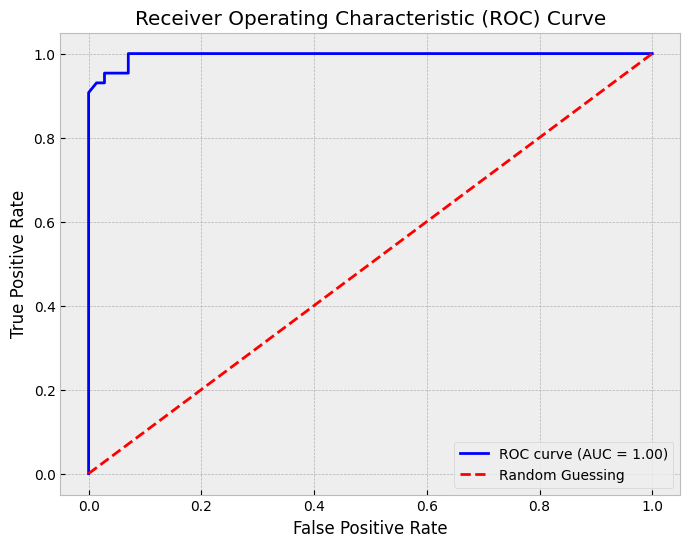

In [162]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de entrada (se asume que X y y ya están definidos)
# Normalización y separación de conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Aplicar validación cruzada con 5 pliegues (folds)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print("Puntuaciones de validación cruzada:", cv_scores)
print("Precisión media:", np.mean(cv_scores))
print("Desviación estándar:", np.std(cv_scores))

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)
best_score = grid_search.best_score_
print("Mejor puntuación de precisión encontrada:", best_score)

# Entrenar un nuevo modelo RandomForestClassifier con los mejores hiperparámetros
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Realizar predicciones con el nuevo modelo
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluar el rendimiento del modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Exactitud del modelo ajustado:", accuracy_best)
print("Matriz de Confusión del modelo ajustado:")
print(confusion_matrix(y_test, y_pred_best))
print("Informe de Clasificación del modelo ajustado:")
print(classification_report(y_test, y_pred_best))

# Evaluación del modelo original
print("Exactitud del modelo original:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión del modelo original:")
print(confusion_matrix(y_test, y_pred))
print("Informe de Clasificación del modelo original:")
print(classification_report(y_test, y_pred))

# Análisis de la curva ROC y AUC para el modelo ajustado
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba_best = best_rf_classifier.predict_proba(X_test)
y_pred_proba_positive_best = y_pred_proba_best[:, 1]

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_positive_best)
auc_best = roc_auc_score(y_test, y_pred_proba_positive_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', label=f'ROC curve (AUC = {auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()